# ECE 657A - Assignment 2
Submission Date: 10 March 2022

## Libraries

We start by loading the necessary libraries

In [1]:
# List of libraries
import math
import numpy as np
import pandas as pd
import random
import seaborn as sns
from sklearn import neighbors
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt 

## Loading the Datasets

Before starting with the questions, we will first load the dataset that are required for this assignment.
We will load the Abalone Dataset and the Wine dataset as shown below:

### Abalone Dataset

For loading the abalone data, please see the code below:

In [2]:
# Columns/ Features for the data
heading = ["Sex", "Length (mm)", "Diameter (mm)", "Height (mm)", "Whole Weight (g)", "Shucked Weight (g)", "Viscera Weight (g)", "Shell Weight (g)", "Rings"]

#Loading Data set by using pandas
abalone = pd.read_csv("abalone.csv", sep=",", names = heading)

For the purposes of this assignment, we will drop the sex feature because it is a categorical feature and does not work well with feature reduction.

In [3]:
# Making a dataset by removing the categorical data and the label
abalone_remaining_features = abalone.drop(columns = ["Sex","Rings"])

# The target variable is the following
abalone_rings = abalone["Rings"]

# The Minimum-Maximum Normalized dataset is the following
abalone_raw= ((abalone_remaining_features-abalone_remaining_features.min())/(abalone_remaining_features.max()-abalone_remaining_features.min()))

# The train test split of the Minimum-Maximum Normalized Abalone data
abalone_raw_train , abalone_raw_test, abalone_rings_raw_train, abalone_rings_raw_test = train_test_split(abalone_raw,abalone_rings,test_size = 0.20,train_size=0.8, random_state=27)

For this assignment, abalone_raw will represent the Minimum-Maximum Normalized Abalone features

### Wine Dataset

Now we will load the wine dataset which is shown below:

In [4]:
# loading the two wine datasets
wine_r = pd.read_csv("winequality-red.csv", sep=";")
wine_w = pd.read_csv("winequality-white.csv", sep=";")

#Columns/Features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]

# concatenation of the two wine datasets
wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r], ignore_index=True)

For the purposes of this assignment, we will drop the color feature because it is a categorical feature and does not work well with feature reduction.

In [5]:
# Making a dataset of just the features
wine_remaining_features = wine.drop(columns = ["color","quality"])

# The target variable is the following
wine_quality = wine['quality']

# The Minimum-Maximum Normalized dataset is the following
wine_raw= ((wine_remaining_features-wine_remaining_features.min())/(wine_remaining_features.max()-wine_remaining_features.min()))

# The train test split of the Minimum-Maximum Normalized Wine data
wine_raw_train , wine_raw_test, wine_quality_raw_train, wine_quality_raw_test = train_test_split(wine_raw,wine_quality,test_size = 0.20,train_size=0.8, random_state=27)

For this assignment, wine_raw will represent the Minimum-Maximum Normalized Wine features

## Question 1: Representation Learning

### 1.1 PCA, LDA & t-SNE

#### 1.1.1 Abalone Dataset

##### PCA

For generating a PCA plot of the abalone raw dataset, we will execute the following commands:

In [6]:
# construct the PCA classifier for the abalone dataset
abalone_pca_all = PCA(n_components = (len(abalone_raw.columns)))

# make an array to name the principal components of the Abalone Dataset
abalone_col = ["PC-1","PC-2","PC-3","PC-4","PC-5","PC-6","PC-7"]

# executing PCA on the Min-Max Normalized Abalone Dataset using the training dataset
abalone_pca_all_train = pd.DataFrame(abalone_pca_all.fit_transform(abalone_raw_train),columns = abalone_col)

# executing PCA on the Min-Max Normalized Abalone Dataset using the testing dataset 
abalone_pca_all_test = pd.DataFrame(abalone_pca_all.transform(abalone_raw_test),columns = abalone_col)

Now we will add the labels back to the dataset as shown below:

In [7]:
# we will add a feature coloumn for the rings in the training set
abalone_pca_all_train["Rings"] = abalone_rings_raw_train.reset_index().drop(columns=["index"])

# we will add a feature coloumn for the rings in the testing set
abalone_pca_all_test["Rings"] = abalone_rings_raw_test.reset_index().drop(columns=["index"])

The final PCA dataset is the concatenation of the following datasets:

In [8]:
abalone_pca_all_final = pd.concat([abalone_pca_all_train,abalone_pca_all_test])

Now we will plot the graph of the PCA as shown below:

Text(0.5, 1.0, 'Abalone Minimum-Maximum Normalized PCA Dataset')

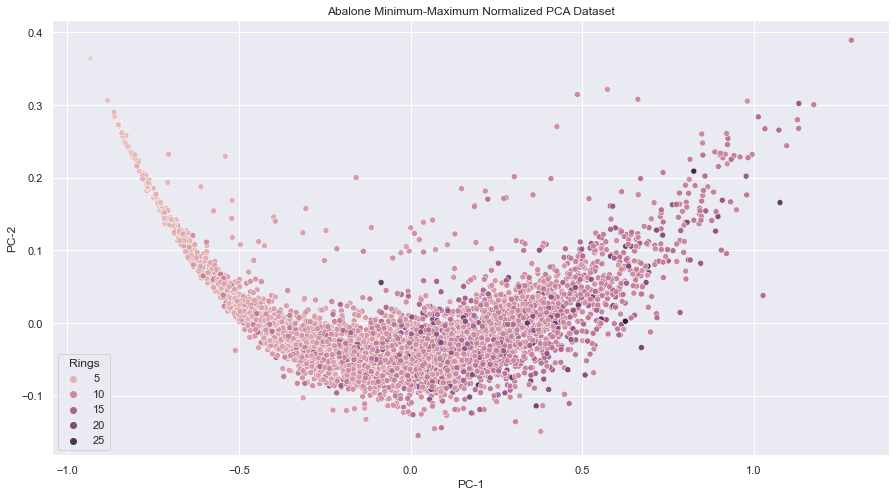

In [9]:
# initialize the plot
sns.set(rc = {'figure.figsize':(15,8)})

# provide the information regarding the scatter plot
sns.scatterplot(data = abalone_pca_all_final, x = "PC-1", y = "PC-2", hue = "Rings")

# assign a title to the plot
plt.title("Abalone Minimum-Maximum Normalized PCA Dataset")

##### LDA

In [10]:
# initialize the LDA Classifier with all the components
abalone_lda_all = LinearDiscriminantAnalysis(n_components = len(abalone_raw.columns))

# ascertaining the mean and the standard deviation of the training data and then training the classifier using Min-Max Normalized abalone data
abalone_lda_all_train = pd.DataFrame(abalone_lda_all.fit_transform(abalone_raw_train, abalone_rings_raw_train))

# transform the test data using the transform function
abalone_lda_all_test = pd.DataFrame(abalone_lda_all.transform(abalone_raw_test))

The final PCA dataset is the concatenation of the following datasets:

In [11]:
# we will add a feature coloumn for the rings in the training set
abalone_lda_all_train["Rings"] = abalone_rings_raw_train.reset_index().drop(columns=["index"])

# we will add a feature coloumn for the rings in the testing set
abalone_lda_all_test["Rings"] = abalone_rings_raw_test.reset_index().drop(columns=["index"])

Now we will concatenate the two datasets as shown below:

In [12]:
abalone_lda_all_final = pd.concat([abalone_lda_all_train,abalone_lda_all_test])

Now we will plot the graph of the LDA as shown below:

Text(0, 0.5, 'Component - 2')

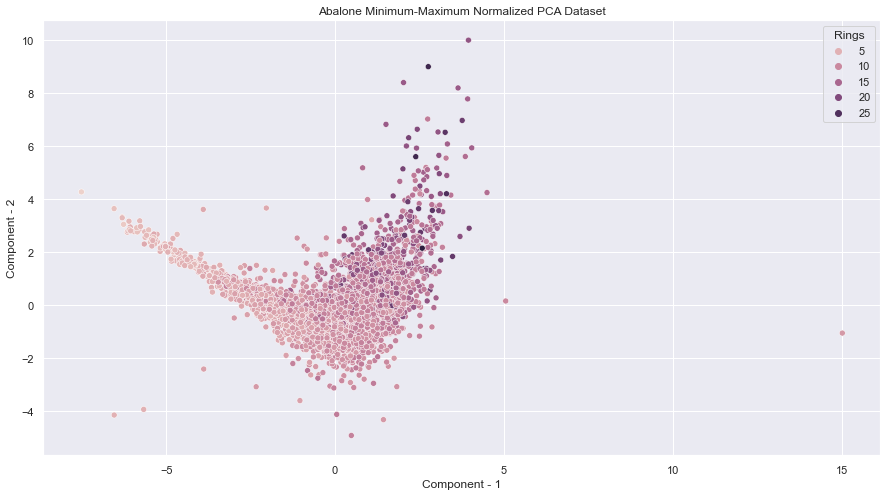

In [13]:
# initialize the plot
sns.set(rc = {'figure.figsize':(15,8)})

# provide the information regarding the scatter plot
sns.scatterplot(data = abalone_lda_all_final, x = 0, y = 1, hue = "Rings")

# assign the title, x label & y label to the plot
plt.title("Abalone Minimum-Maximum Normalized PCA Dataset")
plt.xlabel("Component - 1")
plt.ylabel("Component - 2")

##### t-SNE

We will first generate the t-SNE as shown below:

In [14]:
# initialize the t-SNE Classifier with 2 components
abalone_tsne = TSNE(n_components=2, verbose=1, random_state=27)

# fit and train the classifier using the training dataset
abalone_tsne_final = pd.DataFrame(abalone_tsne.fit_transform(abalone_raw, abalone_rings),columns=["Comp-1", "Comp-2"])

C:\Users\ibteh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ibteh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4177 samples in 0.018s...
[t-SNE] Computed neighbors for 4177 samples in 0.350s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4177
[t-SNE] Computed conditional probabilities for sample 2000 / 4177
[t-SNE] Computed conditional probabilities for sample 3000 / 4177
[t-SNE] Computed conditional probabilities for sample 4000 / 4177
[t-SNE] Computed conditional probabilities for sample 4177 / 4177
[t-SNE] Mean sigma: 0.021783
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.945961
[t-SNE] KL divergence after 1000 iterations: 1.141203


Now we will add back the label in the dataset as shown below:

In [15]:
abalone_tsne_final["Rings"] = abalone_rings

Now we will plot the scatter plot of the t-SNE data as shown below:

Text(0.5, 1.0, 't-SNE graph of Min-Max Normalized Abalone Dataset')

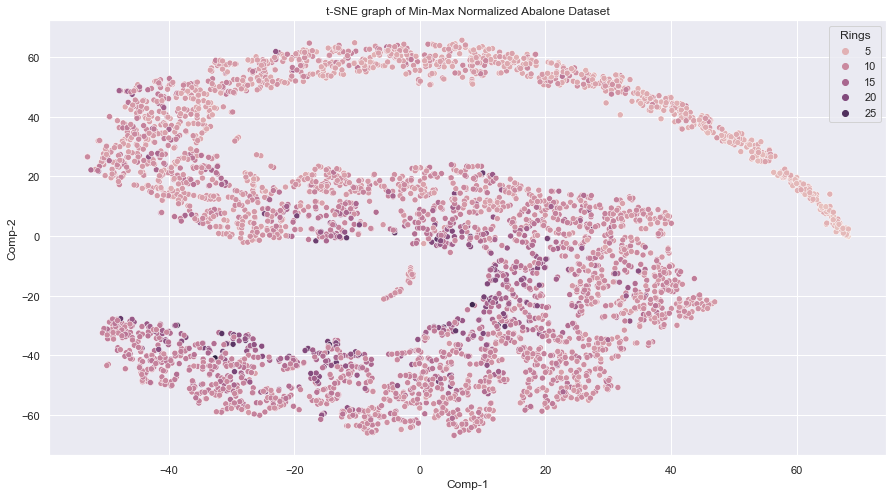

In [16]:
# initialize the plot
sns.set(rc = {'figure.figsize':(15,8)})

# provide the paramters of the plot
sns.scatterplot(data=abalone_tsne_final, x="Comp-1", y="Comp-2", hue="Rings")

# assign the title of the plot
plt.title("t-SNE graph of Min-Max Normalized Abalone Dataset")

#### 1.1.2 Wine Dataset

##### PCA

For generating a PCA plot of the wine raw dataset, we will train the PCA algorithm and then generate the Principal Components as shown below:

In [17]:
# Initializing the PCA algorithm
wine_pca_all = PCA(n_components = len(wine_raw.columns))

# Array for naming the columns of the PCA dataset
wine_col = ["PC-1","PC-2","PC-3","PC-4","PC-5","PC-6","PC-7","PC-8","PC-9","PC-10","PC-11"]

# executing PCA on the Min-Max Normalized Wine Dataset using the training dataset
wine_pca_all_train = pd.DataFrame(wine_pca_all.fit_transform(wine_raw_train, wine_quality_raw_train), columns = wine_col)

# executing PCA on the Min-Max Normalized wine Dataset using the testing dataset
wine_pca_all_test = pd.DataFrame(wine_pca_all.transform(wine_raw_test),columns = wine_col)

Now we combine the two dataset and add the Quality feature as shown below:

In [18]:
# we will add a feature coloumn for the quality in the training set
wine_pca_all_train["Quality"] = wine_quality_raw_train.reset_index().drop(columns=["index"])

# we will add a feature coloumn for the quality in the testing set
wine_pca_all_test["Quality"] = wine_quality_raw_test.reset_index().drop(columns=["index"])

Now we will concatenate the two dataset as shown below:

In [19]:
wine_pca_all_final = pd.concat([wine_pca_all_train,wine_pca_all_test])

Now we will plot the scatter plot using the principal compoenents as shown below:

Text(0.5, 1.0, 'Wine Min-Max Normalized PCA Dataset')

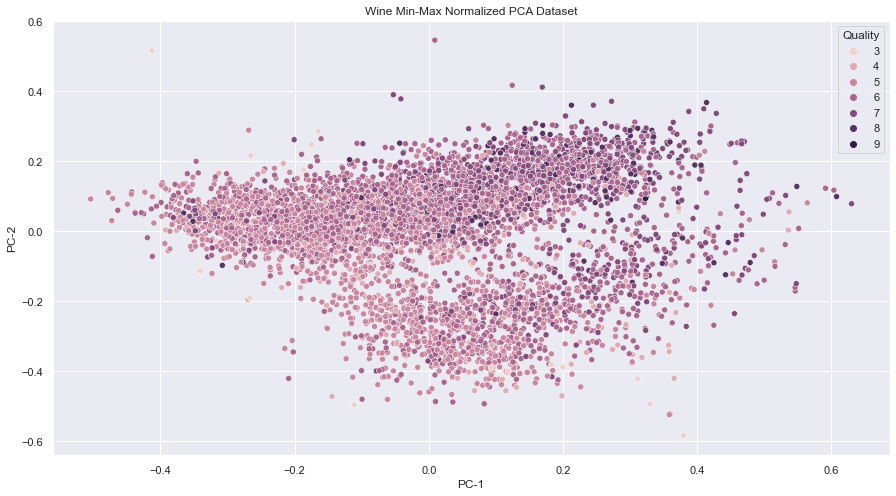

In [20]:
# initialize the plot
sns.set(rc = {'figure.figsize':(15,8)})

# provide the information regarding the scatter plot
sns.scatterplot(data=wine_pca_all_final, x="PC-1", y="PC-2", hue="Quality")

# assign a title to the plot
plt.title("Wine Min-Max Normalized PCA Dataset")

##### LDA

First we will generate the LDA data as shown below:

In [21]:
# initialize the LDA Classifier with 6 components
wine_lda_all = LinearDiscriminantAnalysis(n_components = 6)

# ascertaining the mean and the standard deviation of the training data and then training the classifier using Min-Max Normalized abalone data
wine_lda_all_train = pd.DataFrame(wine_lda_all.fit_transform(wine_raw_train, wine_quality_raw_train))

# transform the test data using the transform function
wine_lda_all_test = pd.DataFrame(wine_lda_all.transform(wine_raw_test))

Now we will add the label data back to the two datasets as shown below:

In [22]:
# we will add a feature coloumn for the quality in the training set
wine_lda_all_train["Quality"] = wine_quality_raw_train.reset_index().drop(columns=["index"])

# we will add a feature coloumn for the quality in the testing set
wine_lda_all_test["Quality"] = wine_quality_raw_test.reset_index().drop(columns=["index"])

We will concatenate the two datasets as shown below:

In [23]:
wine_lda_all_final = pd.concat([wine_lda_all_train,wine_lda_all_test])

##### t-SNE

First we will generate the t-SNE dataset as shown below:

In [24]:
# initialize the t-SNE Classifier with 2 components
wine_tsne = TSNE(n_components=2, verbose=1, random_state=27)

# fit and train the classifier using the training dataset
wine_tsne_final = pd.DataFrame(wine_tsne.fit_transform(wine_raw, wine_quality),columns=["Comp-1", "Comp-2"])

# Concatenate the quality feature to the dataset
wine_tsne_final["Quality"] =  wine_quality

C:\Users\ibteh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ibteh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6497 samples in 0.045s...
[t-SNE] Computed neighbors for 6497 samples in 1.737s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6497
[t-SNE] Computed conditional probabilities for sample 2000 / 6497
[t-SNE] Computed conditional probabilities for sample 3000 / 6497
[t-SNE] Computed conditional probabilities for sample 4000 / 6497
[t-SNE] Computed conditional probabilities for sample 5000 / 6497
[t-SNE] Computed conditional probabilities for sample 6000 / 6497
[t-SNE] Computed conditional probabilities for sample 6497 / 6497
[t-SNE] Mean sigma: 0.069755
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.371368
[t-SNE] KL divergence after 1000 iterations: 1.374188


Now we will plot the graph as shown below:

Text(0.5, 1.0, 't-SNE graph of Wine Dataset')

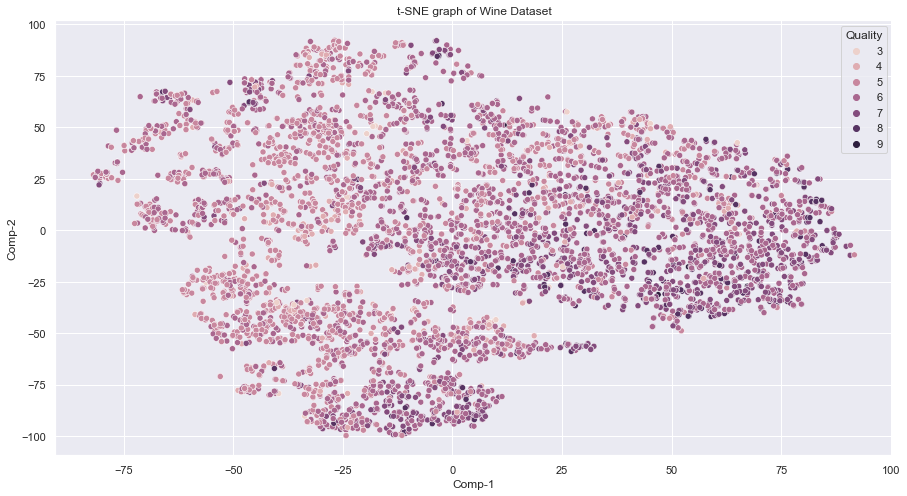

In [25]:
# initialize the t-SNE plot
sns.set(rc = {'figure.figsize':(15,8)})

# assign the datapoints for the axes
sns.scatterplot(data= wine_tsne_final, x="Comp-1", y="Comp-2", hue="Quality")

# assign the graph title
plt.title("t-SNE graph of Wine Dataset")

### 1.2 PCA Scree-Plot

#### 1.2.1 Abalone Dataset

We will plot the scree plot by using the explained variance ratio of the sklearn.pca library

Text(0.5, 1.0, 'Scree Plot of Min-Max Normalized Abalone Dataset')

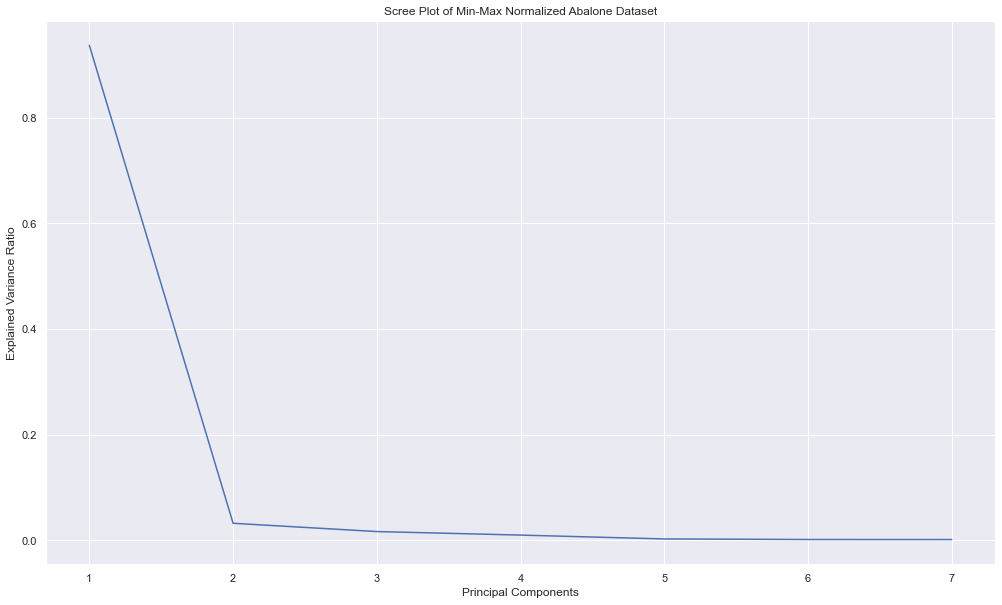

In [26]:
# make a list of array of all of the Principal Component
abalone_PC_values = np.arange(abalone_pca_all.n_components_) + 1

# initialize a plot using seaborn
sns.set(rc = {'figure.figsize':(17,10)})

# assign the datapoints for the axes
sns.lineplot( x=abalone_PC_values, y=abalone_pca_all.explained_variance_ratio_)

# assign the X-Axis label
plt.xlabel("Principal Components")

# assign the Y-Axis label
plt.ylabel("Explained Variance Ratio")

# assign the Graph title
plt.title("Scree Plot of Min-Max Normalized Abalone Dataset")

#### 1.2.2 Wine Dataset

We will plot the scree plot by using the explained variance ratio of the sklearn.pca library

Text(0.5, 1.0, 'Scree Plot of Min-Max Normalized Wine Dataset')

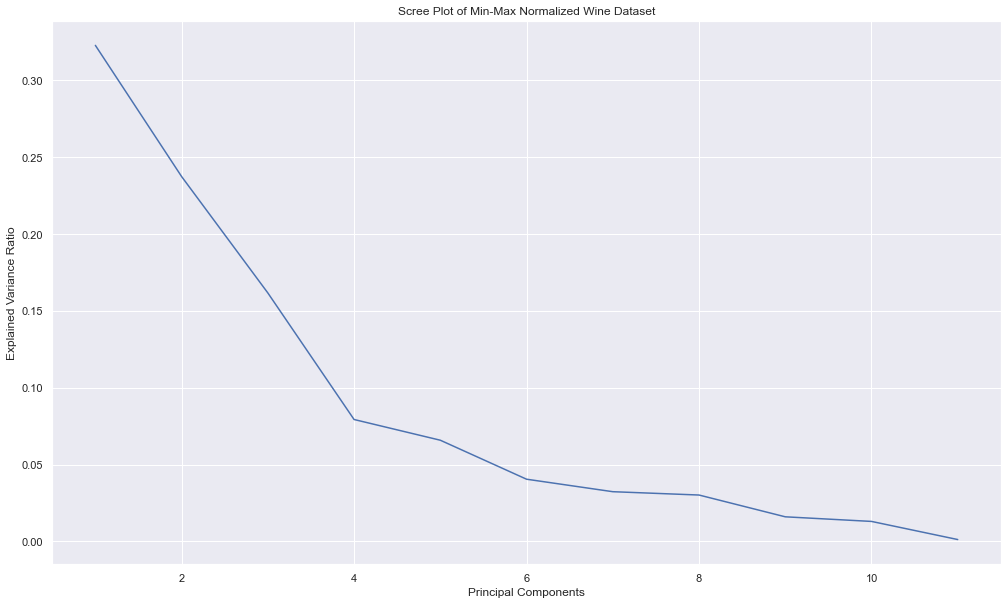

In [27]:
# make a list of array of all of the Principal Component
wine_PC_values = np.arange(wine_pca_all.n_components_) + 1

# initialize a plot using seaborn
sns.set(rc = {'figure.figsize':(17,10)})

# assign the datapoints for the axes
sns.lineplot( x=wine_PC_values, y=wine_pca_all.explained_variance_ratio_)

# assign the X-Axis label
plt.xlabel("Principal Components")

# assign the Y-Axis label
plt.ylabel("Explained Variance Ratio")

# assign the Graph title
plt.title("Scree Plot of Min-Max Normalized Wine Dataset")

### 1.3 kNN using PCA

##### 1.3.1 Abalone Dataset

From the previous assignment, among the normalized datasets, the best accuracy was achieved at k = 115 and Euclidean distance. Therefore, we will use these setting for the determining the best number of Principal Components

To find the best number of Principal Components, we will create a for loop in which we generate a kNN classifier and dataset for a specific  number of principal component. This will be in the range of 2 to 7. Then we are going to train these classifiers as shown below:

In [28]:
# initialize for loop to generate the kNN classifier and its respective dataset for  "i"  principal components 
for i in range(2,abalone_pca_all_train.shape[1]): 
    
    # generate kNN classifier for each set of principal component ranging from 2 to 7
    globals()[f"abalone_pca_all_knn_{i}"] = KNeighborsClassifier(n_neighbors=115, weights="distance", p=2)

    # train each classifier with PCA training data with the respective number of principal components
    globals()[f"abalone_pca_all_knn_{i}"].fit( abalone_pca_all_train.iloc[:,0:i], abalone_pca_all_train["Rings"])

Now, we will use the test data to see the performance of each of the classifier by using a for loop as shown below:

In [29]:
# initialize the array for the test scores of the different classifiers
abalone_pca_knn_scores = []

# initialize the for loop to check the performance of the classifier on the PCA test data
for i in range(2,abalone_pca_all_train.shape[1]):

    # fit the PCA test data with the respective features subset on the classifier and store the result
    abalone_pca_knn_scores.append(globals()[f"abalone_pca_all_knn_{i}"].score(abalone_pca_all_test.iloc[:,0:i],abalone_pca_all_test["Rings"]))

We saved all the scores in the abalone_pca_knn_scores array

The principal components required to achieve the maximum accuracy is shown below: 

In [30]:
print("Number of Principal Components required for maximum accuracy: " + str(abalone_pca_knn_scores.index(max(abalone_pca_knn_scores)) + 2))

Number of Principal Components required for maximum accuracy: 3


Now we will plot the graph of the accuracy on the y-axis and the number of principal components on the x-axis

Text(0.5, 1.0, 'Accuracy of plot of the kNN Classifier using Abalone PCA')

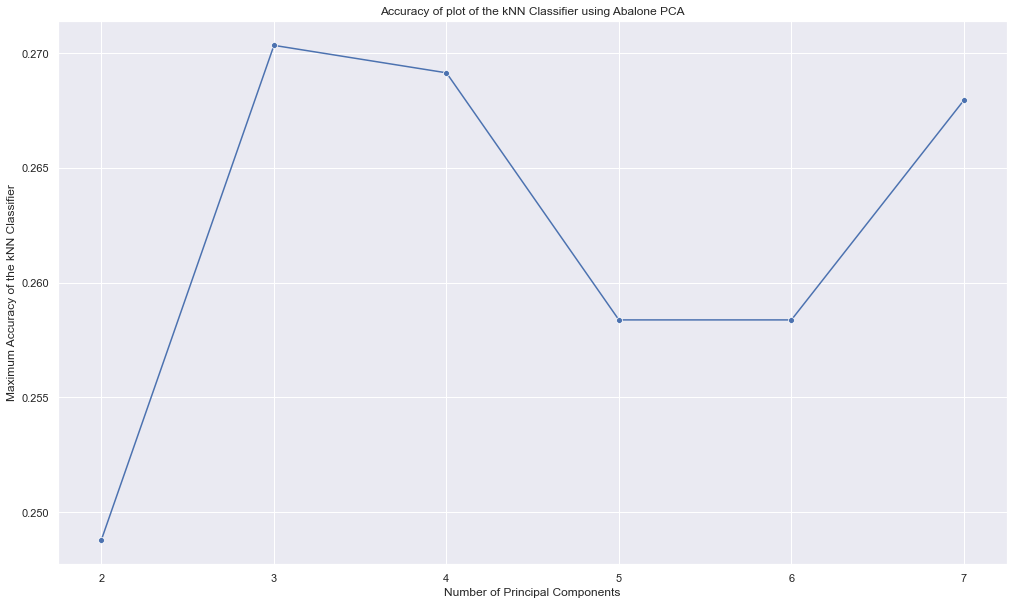

In [31]:
sns.set(rc = {'figure.figsize':(17,10)})
sns.lineplot( x=(range(2, (len(abalone_pca_knn_scores)+2))), y=abalone_pca_knn_scores,marker="o")
plt.xlabel("Number of Principal Components")
plt.ylabel("Maximum Accuracy of the kNN Classifier")
plt.title("Accuracy of plot of the kNN Classifier using Abalone PCA")

For the PCA data, 3 principal components generate the best accuracy with the test data. Moving forward, we are only going to be using 3 principal components in the remaining questions. For that, we will generate the datset which is shown below:

In [32]:
# generate the training set
abalone_pca_train = abalone_pca_all_train.iloc[:,0:3]
abalone_pca_train["Rings"] = abalone_pca_all_train["Rings"]

# generate the test set
abalone_pca_test = abalone_pca_all_test.iloc[:,0:3]
abalone_pca_test["Rings"] = abalone_pca_all_test["Rings"]

C:\Users\ibteh\AppData\Local\Temp/ipykernel_10572/3674897567.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abalone_pca_test["Rings"] = abalone_pca_all_test["Rings"]


##### 1.3.2 Wine Dataset

From the previous assignment, among the normalized datasets, the best accuracy was achieved at k = 124 and Manhattan distance. Therefore, we will use these setting for the determining the best number of Principal Components

To find the best number of Principal Components, we will create a for loop in which we generate a kNN classifier and dataset for a specific  number of principal component. This will be in the range of 2 to 11. Then we are going to train these classifiers as shown below:

In [33]:
# initialize for loop to generate the kNN classifier and its respective dataset for  "i"  principal components 
for i in range(2,wine_pca_all_train.shape[1]):

    # # generate kNN classifier for each set of principal component ranging from 2 to 11
    globals()[f"wine_pca_all_knn_{i}"] = KNeighborsClassifier(n_neighbors=124, weights="distance", p=1)

    # train each classifier with PCA training data with the respective number of principal components
    globals()[f"wine_pca_all_knn_{i}"].fit( wine_pca_all_train.iloc[:,0:i], wine_pca_all_train["Quality"])

Now, we will use the test data to see the performance of each of the classifier by using a for loop as shown below:

In [34]:
# initialize the array for the test scores of the different classifiers
wine_pca_knn_scores = []

# initialize the for loop to check the performance of the classifier on the PCA test data
for i in range(2,wine_pca_all_train.shape[1]):

    # fit the PCA test data with the respective features subset on the classifier and store the result
    wine_pca_knn_scores.append(globals()[f"wine_pca_all_knn_{i}"].score(wine_pca_all_test.iloc[:,0:i],wine_pca_all_test["Quality"]))

We saved all the scores in the abalone_pca_knn_scores array

The principal components required to achieve the maximum accuracy is shown below: 

In [35]:
print("Number of Principal Components required for maximum accuracy: " + str(wine_pca_knn_scores.index(max(wine_pca_knn_scores)) + 2))

Number of Principal Components required for maximum accuracy: 7


Now we will plot the graph of the accuracy on the y-axis and the number of principal components on the x-axis

Text(0.5, 1.0, 'Accuracy of plot of the kNN Classifier using Wine PCA')

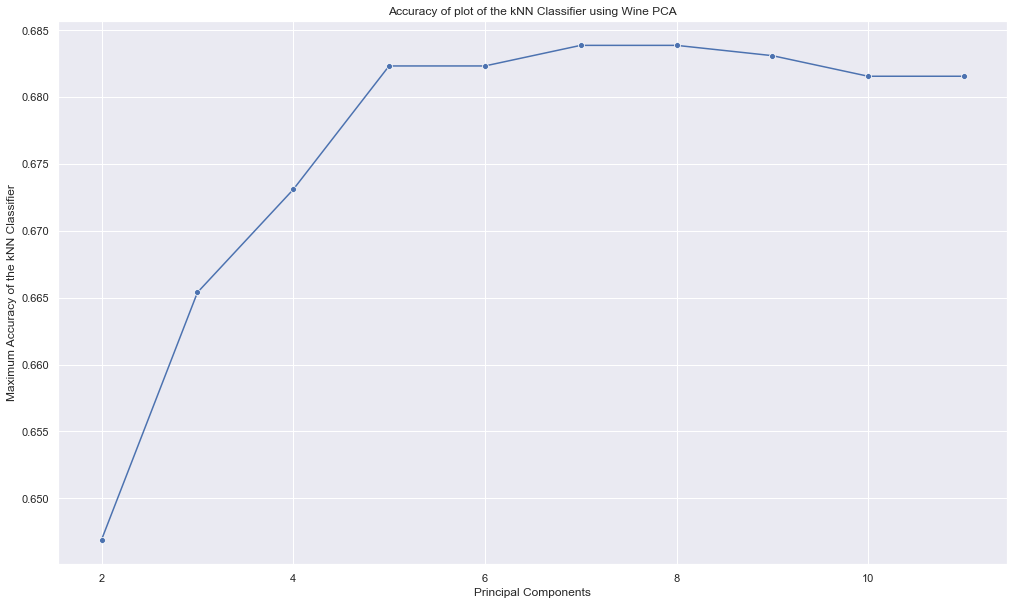

In [36]:
sns.set(rc = {'figure.figsize':(17,10)})
sns.lineplot( x=(range(2, (len(wine_pca_knn_scores)+2))), y=wine_pca_knn_scores,marker="o")
plt.xlabel("Principal Components")
plt.ylabel("Maximum Accuracy of the kNN Classifier")
plt.title("Accuracy of plot of the kNN Classifier using Wine PCA")

For the PCA data, 7 principal components generate the best accuracy with the test data. Moving forward, we are only going to be using 7 principal components in the remaining question. For that, we will generate the datset which is shown below:

In [37]:
# generate the training set
wine_pca_train = wine_pca_all_train.iloc[:,0:7]
wine_pca_train["Quality"] = wine_pca_all_train["Quality"]

# generate the test set
wine_pca_test = wine_pca_all_test.iloc[:,0:7]
wine_pca_test["Quality"] = wine_pca_all_test["Quality"]

C:\Users\ibteh\AppData\Local\Temp/ipykernel_10572/330867122.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_pca_test["Quality"] = wine_pca_all_test["Quality"]


### 1.4 kNN using LDA

##### 1.4.1 Abalone Dataset

Now we will use the kNN classifier to see what is the performance with different number of principal components

In [38]:
# initialize for loop to generate the kNN classifier and its respective dataset for  "i"  principal components 
for i in range(2,abalone_lda_all_train.shape[1]):
    
    # generate kNN classifier for each set of component ranging from 2 to 7
    globals()[f"abalone_lda_all_knn_{i}"] = KNeighborsClassifier(n_neighbors=115, weights="distance", p=2)

    # train each classifier with LDA training data with the respective number of principal components
    globals()[f"abalone_lda_all_knn_{i}"].fit( abalone_lda_all_train.iloc[:,0:i], abalone_lda_all_train["Rings"])

Now we will use test data to see the accuracy of the classifiers and save the data in an array as shown below:

In [39]:
# initialize the array for the test scores of the different classifiers
abalone_lda_knn_scores = []

# initialize the for loop to check the performance of the classifier on the LDA test data
for i in range(2,abalone_lda_all_train.shape[1]):

    # fit the LDA test data with the respective features subset on the classifier and store the result
    abalone_lda_knn_scores.append(globals()[f"abalone_lda_all_knn_{i}"].score(abalone_lda_all_test.iloc[:,0:i],abalone_lda_all_test["Rings"]))

The number of components required for the best accuracy is shown below:

In [40]:
print("Number of Components required for maximum accuracy: " + str(abalone_lda_knn_scores.index(max(abalone_lda_knn_scores)) + 2))

Number of Components required for maximum accuracy: 3


Now we will plot the graph of the accuracy on the y-axis and the number of principal components on the x-axis

Text(0.5, 1.0, 'Accuracy of plot of the kNN Classifier using Abalone LDA')

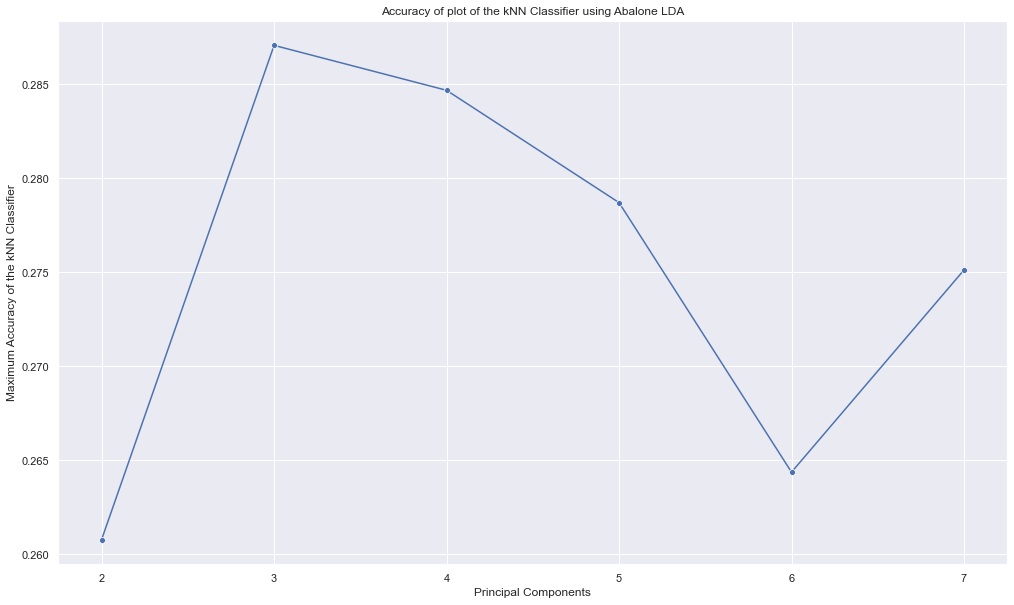

In [41]:
# initialize the plot
sns.set(rc = {'figure.figsize':(17,10)})

# input the necessary parameters for the plot
sns.lineplot( x=(range(2, (len(abalone_lda_knn_scores)+2))), y=abalone_lda_knn_scores,marker="o")

# assign the x label of the graph
plt.xlabel("Principal Components")

# assign the y label of the graph
plt.ylabel("Maximum Accuracy of the kNN Classifier")

# assign the title of the graph
plt.title("Accuracy of plot of the kNN Classifier using Abalone LDA")

In [42]:
# generate the training set
abalone_lda_train = abalone_lda_all_train.iloc[:,0:4]
abalone_lda_train["Rings"] = abalone_lda_all_train["Rings"]

# generate the test set
abalone_lda_test = abalone_lda_all_test.iloc[:,0:4]
abalone_lda_test["Rings"] = abalone_lda_all_test["Rings"]

C:\Users\ibteh\AppData\Local\Temp/ipykernel_10572/1847642409.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abalone_lda_train["Rings"] = abalone_lda_all_train["Rings"]
C:\Users\ibteh\AppData\Local\Temp/ipykernel_10572/1847642409.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abalone_lda_test["Rings"] = abalone_lda_all_test["Rings"]


##### 1.3.2 Wine Dataset

Now we will use the kNN classifier to see what is the performance with different number of principal components

In [43]:
# initialize for loop to generate the kNN classifier and its respective dataset for  "i"  principal components 
for i in range(2,wine_lda_all_train.shape[1]):

    # generate kNN classifier for each set of principal component ranging from 2 to 11
    globals()[f"wine_lda_knn_{i}"] = KNeighborsClassifier(n_neighbors=124, weights="distance", p=1)

    # train each classifier with LDA training data with the respective number of principal components
    globals()[f"wine_lda_knn_{i}"].fit( wine_lda_all_train.iloc[:,0:i], wine_lda_all_train["Quality"])
    #print(globals()[f"wine_lda_knn_{i}"])

In [44]:
# initialize the array to store the test scores of the different classifiers
wine_lda_knn_scores = []

# initialize the for loop to check the performance of the classifier on the LDA test data
for i in range(2,wine_lda_all_train.shape[1]):

    # fit the LDA test data with the respective features subset on the classifier and store the result
    wine_lda_knn_scores.append(globals()[f"wine_lda_knn_{i}"].score(wine_lda_all_test.iloc[:,0:i],wine_lda_all_test["Quality"]))

The number of components required to achieve the maximum accuracy is shown below:

In [45]:
print("Number of Components required for maximum accuracy: " + str(wine_lda_knn_scores.index(max(wine_lda_knn_scores)) + 2))

Number of Components required for maximum accuracy: 3


Now we will plot the graph of the accuracy on the y-axis and the number of principal components on the x-axis

Text(0.5, 1.0, 'Accuracy of plot of the kNN Classifier using Wine LDA')

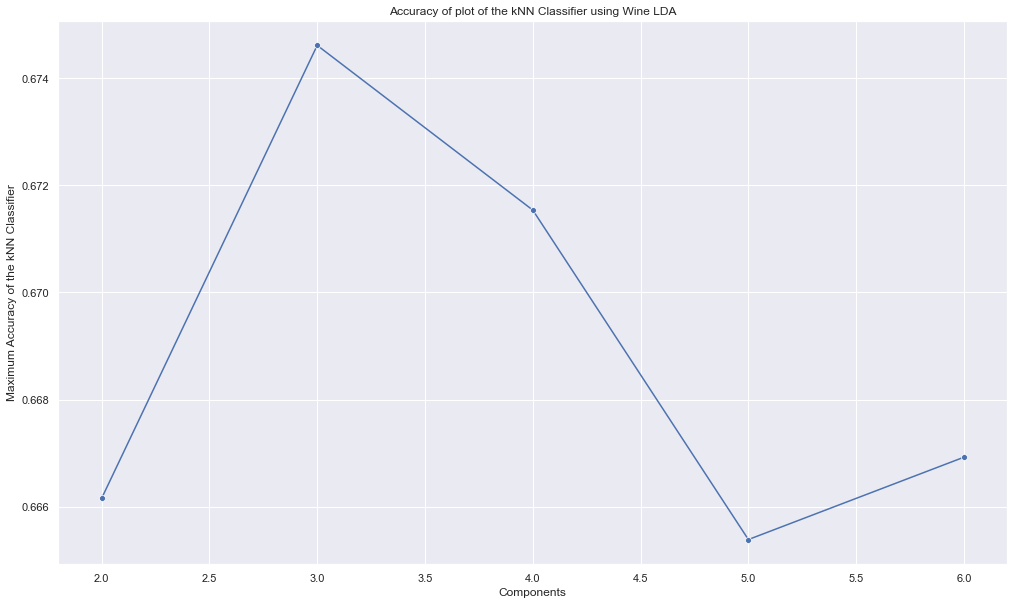

In [46]:
# initialize the plot
sns.set(rc = {'figure.figsize':(17,10)})

# provide the necessary parameters for the plot
sns.lineplot( x=(range(2, (len(wine_lda_knn_scores)+2))), y=wine_lda_knn_scores,marker="o")

# assign the x label for the graph
plt.xlabel("Components")

# assign the y label for the graph
plt.ylabel("Maximum Accuracy of the kNN Classifier")

# assign the title for the graph
plt.title("Accuracy of plot of the kNN Classifier using Wine LDA")

Now we will generate the training and testing dataset which will be used for the remaining questions

In [47]:
# generate the training set
wine_lda_train = wine_lda_all_train.iloc[:,0:3]
wine_lda_train["Quality"] = wine_lda_all_train["Quality"]

# generate the testing set
wine_lda_test = wine_lda_all_test.iloc[:,0:3]
wine_lda_test["Quality"] = wine_lda_all_test["Quality"]

C:\Users\ibteh\AppData\Local\Temp/ipykernel_10572/48904243.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_lda_train["Quality"] = wine_lda_all_train["Quality"]
C:\Users\ibteh\AppData\Local\Temp/ipykernel_10572/48904243.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_lda_test["Quality"] = wine_lda_all_test["Quality"]


## Question 2: Naive Bayes Classifier

### 2.1

#### 2.1.1 Abalone Dataset

##### Multinomial Naive Bayes using Normalized Data

We will first conduct the cross validation using the Multinomial Naive Bayes using the training set and generate the mean validation accuracy as shown below:

In [48]:
# cross validation of the Multinomial Naive Bayes classifier using raw abalone training dataset
abalone_raw_mnb_train_cv = cross_validate(MultinomialNB(), abalone_raw_train, abalone_rings_raw_train, cv=5)

# mean validation accuracy
abalone_raw_mnb_train_cv_score = np.mean(abalone_raw_mnb_train_cv["test_score"])
abalone_raw_mnb_train_cv_score

C:\Users\ibteh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.16701619183158348

Now we will initialize a multinomial Naive Bayes classifier and train it with training set as shown below:

In [49]:
# initialize the Multinomial Naive Bayes Classifier for the raw abalone dataset
abalone_raw_mnb = MultinomialNB()

# fit the raw abalone training data into the classifier
abalone_raw_mnb.fit(abalone_raw_train, abalone_rings_raw_train)

MultinomialNB()

Now we will use the testing dataset to see the performance as shown below:

In [50]:
# check the performance of the Multinomial Naive Bayes Classifier using the raw testing dataset
abalone_raw_mnb_cscore_testing = abalone_raw_mnb.score(abalone_raw_test, abalone_rings_raw_test)
abalone_raw_mnb_cscore_testing

0.15789473684210525

##### Complement Naive Bayes using Normalized Data

We will first conduct the cross validation using the Complement Naive Bayes using the training set and generate the mean validation accuracy as shown below:

In [51]:
# cross validation of the Complement Naive Bayes classifier using raw abalone training dataset
abalone_raw_cnb_train_cv = cross_validate(ComplementNB(), abalone_raw_train, abalone_rings_raw_train, cv=5)

# mean validation accuracy
abalone_raw_cnb_train_cv_score = np.mean(abalone_raw_cnb_train_cv["test_score"])
abalone_raw_cnb_train_cv_score

C:\Users\ibteh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.1735972002183973

Now we will initialize a Complement Naive Bayes classifier and train it with training set as shown below:

In [52]:
# initialize the Complement Naive Bayes Classifier for the raw abalone dataset
abalone_raw_cnb = ComplementNB()

# fit the raw abalone training data into the classifier
abalone_raw_cnb.fit(abalone_raw_train, abalone_rings_raw_train)

ComplementNB()

Now we will use the testing dataset to see the performance as shown below:

In [53]:
# check the performance of the Complement Naive Bayes Classifier using the raw testing dataset
abalone_raw_cnb_cscore_testing = abalone_raw_cnb.score(abalone_raw_test, abalone_rings_raw_test)
abalone_raw_cnb_cscore_testing

0.1674641148325359

##### Multinomial Naive Bayes using PCA

Since the PCA dataset contains negative values, we will apply Min-Max Normalization to the PCA components again as shown below:

In [54]:
# drop the ring feature from the PCA train dataset
abalone_pca_train_x = abalone_pca_train.drop(columns=["Rings"])

# drop the ring feature from the PCA test dataset
abalone_pca_test_x = abalone_pca_test.drop(columns=["Rings"])

# Conduct the Minimum - Maximum Normalization on the PCA dataset
abalone_PCAminmax_train = ((abalone_pca_train_x-abalone_pca_train_x.min())/(abalone_pca_train_x.max()-abalone_pca_train_x.min()))
abalone_rings_PCAminmax_train = abalone_pca_train["Rings"]


abalone_PCAminmax_test = ((abalone_pca_test_x-abalone_pca_test_x.min())/(abalone_pca_test_x.max()-abalone_pca_test_x.min()))
abalone_rings_PCAminmax_test = abalone_pca_test["Rings"]

We will first conduct the cross validation using the Multinomial Naive Bayes using the training set and generate the mean validation accuracy as shown below:

In [55]:
# cross validation of the Multinomial Naive Bayes classifier using raw abalone training dataset
abalone_pca_mnb_train_cv = cross_validate(MultinomialNB(),abalone_PCAminmax_train , abalone_rings_PCAminmax_train, cv=5)

# mean validation accuracy
abalone_pca_mnb_train_cv_score = np.mean(abalone_pca_mnb_train_cv["test_score"])
abalone_pca_mnb_train_cv_score

C:\Users\ibteh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.16671679063397868

Now we will initialize a multinomial Naive Bayes classifier and train it with training set as shown below:

In [56]:
# initialize the Multinomial Naive Bayes Classifier for the pca abalone dataset
abalone_pca_mnb = MultinomialNB()

# fit the pca abalone training data into the classifier
abalone_pca_mnb.fit(abalone_PCAminmax_train , abalone_rings_PCAminmax_train)

MultinomialNB()

Now we will use the testing dataset to see the performance as shown below:

In [57]:
# check the performance of the Multinomial Naive Bayes Classifier using the PCA testing dataset
abalone_pca_mnb_cscore_testing = abalone_pca_mnb.score(abalone_PCAminmax_test , abalone_rings_PCAminmax_test)
abalone_pca_mnb_cscore_testing

0.15789473684210525

##### Complement Naive Bayes using PCA

In [58]:
# cross validation of the Complement Naive Bayes classifier using pca abalone training dataset
abalone_pca_cnb_train_cv = cross_validate(ComplementNB(),abalone_PCAminmax_train , abalone_rings_PCAminmax_train, cv=5)

# mean validation accuracy
abalone_pca_cnb_train_cv_score = np.mean(abalone_pca_cnb_train_cv["test_score"])
abalone_pca_cnb_train_cv_score

C:\Users\ibteh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.1786829927588769

Now we will initialize a Complement Naive Bayes classifier and train it with training set as shown below:

In [59]:
# initialize the Complement Naive Bayes Classifier for the raw abalone dataset
abalone_pca_cnb = ComplementNB()

# fit the raw abalone training data into the classifier
abalone_pca_cnb.fit(abalone_PCAminmax_train , abalone_rings_PCAminmax_train)

ComplementNB()

Now we will use the testing dataset to see the performance as shown below:

In [60]:
# check the performance of the Complement Naive Bayes Classifier using the PCA testing dataset
abalone_pca_cnb_cscore_testing = abalone_pca_cnb.score(abalone_PCAminmax_test , abalone_rings_PCAminmax_test)
abalone_pca_cnb_cscore_testing

0.16148325358851676

##### Multinomial Naive Bayes using LDA

Since some of the LDA values are negative, we will use Minimum Maximum Normalization to remove negative values from the data as shown below:

In [61]:
# drop the ring feature from the PCA train dataset
abalone_lda_train_x = abalone_lda_train.drop(columns=["Rings"])

# drop the ring feature from the lda test dataset
abalone_lda_test_x = abalone_lda_test.drop(columns=["Rings"])

# Conduct the Minimum - Maximum Normalization on the PCA dataset
abalone_LDAminmax_train = ((abalone_lda_train_x-abalone_lda_train_x.min())/(abalone_lda_train_x.max()-abalone_lda_train_x.min()))
abalone_rings_LDAminmax_train = abalone_lda_train["Rings"]


abalone_LDAminmax_test = ((abalone_lda_test_x-abalone_lda_test_x.min())/(abalone_lda_test_x.max()-abalone_lda_test_x.min()))
abalone_rings_LDAminmax_test = abalone_lda_test["Rings"]

We will first conduct the cross validation using the Multinomial Naive Bayes using the training set and generate the mean validation accuracy as shown below:

In [62]:
# cross validation of the Multinomial Naive Bayes classifier using raw abalone training dataset
abalone_lda_mnb_train_cv = cross_validate(MultinomialNB(),abalone_LDAminmax_train , abalone_rings_LDAminmax_train, cv=5)

# mean validation accuracy
abalone_lda_mnb_train_cv_score = np.mean(abalone_lda_mnb_train_cv["test_score"])
abalone_lda_mnb_train_cv_score

C:\Users\ibteh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.16671679063397868

Now we will initialize a multinomial Naive Bayes classifier and train it with training set as shown below:

In [63]:
# initialize the Multinomial Naive Bayes Classifier for the pca abalone dataset
abalone_lda_mnb = MultinomialNB()

# fit the lda abalone training data into the classifier
abalone_lda_mnb.fit(abalone_LDAminmax_train , abalone_rings_LDAminmax_train)

MultinomialNB()

Now we will use the testing dataset to see the performance as shown below:

In [64]:
# check the performance of the Multinomial Naive Bayes Classifier using the LDA testing dataset
abalone_lda_mnb_cscore_testing = abalone_lda_mnb.score(abalone_LDAminmax_test , abalone_rings_LDAminmax_test)
abalone_lda_mnb_cscore_testing

0.15789473684210525

##### Complement Naive Bayes using LDA

In [65]:
# cross validation of the Complement Naive Bayes classifier using LDA abalone training dataset
abalone_lda_cnb_train_cv = cross_validate(ComplementNB(),abalone_LDAminmax_train , abalone_rings_LDAminmax_train, cv=5)

# mean validation accuracy
abalone_lda_cnb_train_cv_score = np.mean(abalone_lda_cnb_train_cv["test_score"])
abalone_lda_cnb_train_cv_score

C:\Users\ibteh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.243335302489192

Now we will initialize a Complement Naive Bayes classifier and train it with training set as shown below:

In [66]:
# initialize the Complement Naive Bayes Classifier for the LDA abalone dataset
abalone_lda_cnb = ComplementNB()

# fit the raw abalone training data into the classifier
abalone_lda_cnb.fit(abalone_LDAminmax_train , abalone_rings_LDAminmax_train)

ComplementNB()

Now we will use the testing dataset to see the performance as shown below:

In [67]:
# check the performance of the Complement Naive Bayes Classifier using the LDA testing dataset
abalone_lda_cnb_cscore_testing = abalone_lda_cnb.score(abalone_LDAminmax_test , abalone_rings_LDAminmax_test)
abalone_lda_cnb_cscore_testing

0.07177033492822966

##### Summary of the Results

We are going to generate a table that is going to display the accuracy of the algorithms on the test data as shown below:

In [68]:
# initialize dataframe
abalone_summary_table = pd.DataFrame()

# make the index column
abalone_summary_table["Method"]= ["Multinomial NB", "Complement NB", "kNN"]
abalone_summary_table.set_index("Method",inplace=True)

# add the relevant data
abalone_summary_table["Raw (Mean Validation Accuracy)"] = [abalone_raw_mnb_train_cv_score,abalone_raw_cnb_train_cv_score, "None"]
abalone_summary_table["Raw (Test Accuracy)"] = [abalone_raw_mnb_cscore_testing,abalone_raw_cnb_cscore_testing, 0.2763]
abalone_summary_table["PCA (Mean Validation Accuracy)"] = [abalone_pca_mnb_train_cv_score,abalone_pca_cnb_train_cv_score, "None"]
abalone_summary_table["PCA (Test Accuracy)"] = [abalone_pca_mnb_cscore_testing,abalone_pca_cnb_cscore_testing, max(abalone_pca_knn_scores)]
abalone_summary_table["LDA (Mean Validation Accuracy)"] = [abalone_lda_mnb_train_cv_score,abalone_lda_cnb_train_cv_score,"None"]
abalone_summary_table["LDA (Test Accuracy)"] = [abalone_lda_mnb_cscore_testing,abalone_lda_cnb_cscore_testing, max(abalone_lda_knn_scores)]

In [69]:
abalone_summary_table

,Raw (Mean Validation Accuracy),Raw (Test Accuracy),PCA (Mean Validation Accuracy),PCA (Test Accuracy),LDA (Mean Validation Accuracy),LDA (Test Accuracy)
Method,,,,,,
Multinomial NB,0.167016,0.157895,0.166717,0.157895,0.166717,0.157895
Complement NB,0.173597,0.167464,0.178683,0.161483,0.243335,0.071770
kNN,None,0.276300,None,0.270335,None,0.287081


As we did not have to run cross validation for the mean validation accuracy, that is shown by "None" in the table above.

#### 2.1.2 Wine Dataset

##### Multinomial Naive Bayes using Normalized Data

We will first conduct the cross validation using the Multinomial Naive Bayes using the training set and generate the mean validation accuracy as shown below:

In [70]:
# cross validation of the Multinomial Naive Bayes classifier using raw wine training dataset
wine_raw_mnb_train_cv = cross_validate(MultinomialNB(), wine_raw_train, wine_quality_raw_train, cv=5)

# mean validation accuracy
wine_raw_mnb_train_cv_score = np.mean(wine_raw_mnb_train_cv["test_score"])
wine_raw_mnb_train_cv_score

C:\Users\ibteh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


0.43602076700969866

Now we will initialize a multinomial Naive Bayes classifier and train it with training set as shown below:

In [71]:
# initialize the Multinomial Naive Bayes Classifier for the raw wine dataset
wine_raw_mnb = MultinomialNB()

# fit the raw wine training data into the classifier
wine_raw_mnb.fit(wine_raw_train, wine_quality_raw_train)

MultinomialNB()

Now we will use the testing dataset to see the performance as shown below:

In [240]:
# check the performance of the Multinomial Naive Bayes Classifier using the raw testing dataset
wine_raw_mnb_cscore_testing = wine_raw_mnb.score(wine_raw_test, wine_quality_raw_test)
wine_raw_mnb_cscore_testing

0.43846153846153846

##### Complement Naive Bayes using Normalized Data

We will first conduct the cross validation using the Complement Naive Bayes using the training set and generate the mean validation accuracy as shown below:

In [73]:
# cross validation of the Complement Naive Bayes classifier using raw wine training dataset
wine_raw_cnb_train_cv = cross_validate(ComplementNB(), wine_raw_train, wine_quality_raw_train, cv=5)

# mean validation accuracy
wine_raw_cnb_train_cv_score = np.mean(wine_raw_cnb_train_cv["test_score"])
wine_raw_cnb_train_cv_score

C:\Users\ibteh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


0.43390112534241504

Now we will initialize a Complement Naive Bayes classifier and train it with training set as shown below:

In [74]:
# initialize the Complement Naive Bayes Classifier for the raw wine dataset
wine_raw_cnb = ComplementNB()

# fit the raw wine training data into the classifier
wine_raw_cnb.fit(wine_raw_train, wine_quality_raw_train)

ComplementNB()

Now we will use the testing dataset to see the performance as shown below:

In [75]:
# check the performance of the Complement Naive Bayes Classifier using the raw testing dataset
wine_raw_cnb_cscore_testing = wine_raw_cnb.score(wine_raw_test, wine_quality_raw_test)
wine_raw_cnb_cscore_testing

0.4276923076923077

##### Multinomial Naive Bayes using PCA

Since the PCA dataset contains negative values, we will apply Min-Max Normalization to the PCA components again as shown below:

In [76]:
# drop the quality feature from the PCA train dataset
wine_pca_train_x = wine_pca_train.drop(columns=["Quality"])

# drop the quality feature from the PCA test dataset
wine_pca_test_x = wine_pca_test.drop(columns=["Quality"])

# Conduct the Minimum - Maximum Normalization on the PCA dataset
wine_PCAminmax_train = ((wine_pca_train_x-wine_pca_train_x.min())/(wine_pca_train_x.max()-wine_pca_train_x.min()))
wine_quality_PCAminmax_train = wine_pca_train["Quality"]


wine_PCAminmax_test = ((wine_pca_test_x-wine_pca_test_x.min())/(wine_pca_test_x.max()-wine_pca_test_x.min()))
wine_quality_PCAminmax_test = wine_pca_test["Quality"]

We will first conduct the cross validation using the Multinomial Naive Bayes using the training set and generate the mean validation accuracy as shown below:

In [77]:
# cross validation of the Multinomial Naive Bayes classifier using raw wine training dataset
wine_pca_mnb_train_cv = cross_validate(MultinomialNB(),wine_PCAminmax_train , wine_quality_PCAminmax_train, cv=5)

# mean validation accuracy
wine_pca_mnb_train_cv_score = np.mean(wine_pca_mnb_train_cv["test_score"])
wine_pca_mnb_train_cv_score

C:\Users\ibteh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


0.43602076700969866

Now we will initialize a multinomial Naive Bayes classifier and train it with training set as shown below:

In [78]:
# initialize the Multinomial Naive Bayes Classifier for the pca abalone dataset
wine_pca_mnb = MultinomialNB()

# fit the pca wine training data into the classifier
wine_pca_mnb.fit(wine_PCAminmax_train , wine_quality_PCAminmax_train)

MultinomialNB()

Now we will use the testing dataset to see the performance as shown below:

In [239]:
# check the performance of the Multinomial Naive Bayes Classifier using the PCA testing dataset
wine_pca_mnb_cscore_testing = wine_pca_mnb.score(wine_PCAminmax_test , wine_quality_PCAminmax_test)
wine_pca_mnb_cscore_testing

0.43846153846153846

##### Complement Naive Bayes using PCA

In [80]:
# cross validation of the Complement Naive Bayes classifier using pca wine training dataset
wine_pca_cnb_train_cv = cross_validate(ComplementNB(),wine_PCAminmax_train , wine_quality_PCAminmax_train, cv=5)

# mean validation accuracy
wine_pca_cnb_train_cv_score = np.mean(wine_pca_cnb_train_cv["test_score"])
wine_pca_cnb_train_cv_score

C:\Users\ibteh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


0.41138853927593094

Now we will initialize a Complement Naive Bayes classifier and train it with training set as shown below:

In [81]:
# initialize the Complement Naive Bayes Classifier for the quality wine dataset
wine_pca_cnb = ComplementNB()

# fit the raw wine training data into the classifier
wine_pca_cnb.fit(wine_PCAminmax_train , wine_quality_PCAminmax_train)

ComplementNB()

Now we will use the testing dataset to see the performance as shown below:

In [82]:
# check the performance of the Complement Naive Bayes Classifier using the PCA testing dataset
wine_pca_cnb_cscore_testing = wine_pca_cnb.score(wine_PCAminmax_test , wine_quality_PCAminmax_test)
wine_pca_cnb_cscore_testing

0.36615384615384616

##### Multinomial Naive Bayes using LDA

Since some of the LDA values are negative, we will use Minimum Maximum Normalization to remove negative values from the data as shown below:

In [83]:
# drop the ring feature from the LDA train dataset
wine_lda_train_x = wine_lda_train.drop(columns=["Quality"])

# drop the ring feature from the lda test dataset
wine_lda_test_x = wine_lda_test.drop(columns=["Quality"])

# Conduct the Minimum - Maximum Normalization on the LDA training dataset
wine_LDAminmax_train = ((wine_lda_train_x-wine_lda_train_x.min())/(wine_lda_train_x.max()-wine_lda_train_x.min()))
wine_quality_LDAminmax_train = wine_lda_train["Quality"]

# Conduct the Minimum - Maximum Normalization on the LDA testing dataset
wine_LDAminmax_test = ((wine_lda_test_x-wine_lda_test_x.min())/(wine_lda_test_x.max()-wine_lda_test_x.min()))
wine_quality_LDAminmax_test = wine_lda_test["Quality"]

We will first conduct the cross validation using the Multinomial Naive Bayes using the training set and generate the mean validation accuracy as shown below:

In [84]:
# cross validation of the Multinomial Naive Bayes classifier using raw wine training dataset
wine_lda_mnb_train_cv = cross_validate(MultinomialNB(),wine_LDAminmax_train , wine_quality_LDAminmax_train, cv=5)

# mean validation accuracy
wine_lda_mnb_train_cv_score = np.mean(wine_lda_mnb_train_cv["test_score"])
wine_lda_mnb_train_cv_score

C:\Users\ibteh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


0.43602076700969866

Now we will initialize a multinomial Naive Bayes classifier and train it with training set as shown below:

In [85]:
# initialize the Multinomial Naive Bayes Classifier for the LDA wine dataset
wine_lda_mnb = MultinomialNB()

# fit the lda wine training data into the classifier
wine_lda_mnb.fit(wine_LDAminmax_train , wine_quality_LDAminmax_train)

MultinomialNB()

Now we will use the testing dataset to see the performance as shown below:

In [86]:
# check the performance of the Multinomial Naive Bayes Classifier using the LDA testing dataset
wine_lda_mnb_cscore_testing = wine_lda_mnb.score(wine_LDAminmax_test , wine_quality_LDAminmax_test)
wine_lda_mnb_cscore_testing

0.43846153846153846

##### Complement Naive Bayes using LDA

In [87]:
# cross validation of the Complement Naive Bayes classifier using LDA wine training dataset
wine_lda_cnb_train_cv = cross_validate(ComplementNB(),wine_LDAminmax_train , wine_quality_LDAminmax_train, cv=5)

# mean validation accuracy
wine_lda_cnb_train_cv_score = np.mean(wine_lda_cnb_train_cv["test_score"])
wine_lda_cnb_train_cv_score

C:\Users\ibteh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


0.4262062264011254

Now we will initialize a Complement Naive Bayes classifier and train it with training set as shown below:

In [88]:
# initialize the Complement Naive Bayes Classifier for the LDA wine dataset
wine_lda_cnb = ComplementNB()

# fit the raw wine training data into the classifier
wine_lda_cnb.fit(wine_LDAminmax_train , wine_quality_LDAminmax_train)

ComplementNB()

Now we will use the testing dataset to see the performance as shown below:

In [89]:
# check the performance of the Complement Naive Bayes Classifier using the LDA testing dataset
wine_lda_cnb_cscore_testing = wine_lda_cnb.score(wine_LDAminmax_test , wine_quality_LDAminmax_test)
wine_lda_cnb_cscore_testing

0.3861538461538462

##### Summary of the Results

We are going to generate a table that is going to display the accuracy of the algorithms on the test data as shown below:

In [90]:
# initialize dataframe
wine_summary_table = pd.DataFrame()

# make the index column
wine_summary_table["Method"]= ["Multinomial NB", "Complement NB", "kNN"]
wine_summary_table.set_index("Method",inplace=True)

# add the relevant data
# There are no mean validation accuracy for kNN as cross_validate was not executed for it
wine_summary_table["Raw (Mean Validation Accuracy)"] = [wine_raw_mnb_train_cv_score,wine_raw_cnb_train_cv_score, "None"]
wine_summary_table["Raw (Test Accuracy)"] = [wine_raw_mnb_cscore_testing,wine_raw_cnb_cscore_testing, 0.6823]
wine_summary_table["PCA (Mean Validation Accuracy)"] = [wine_pca_mnb_train_cv_score,wine_pca_cnb_train_cv_score,"None"]
wine_summary_table["PCA (Test Accuracy)"] = [wine_pca_mnb_cscore_testing,wine_pca_cnb_cscore_testing, max(wine_pca_knn_scores)]
wine_summary_table["LDA (Mean Validation Accuracy)"] = [wine_lda_mnb_train_cv_score,wine_lda_cnb_train_cv_score,"None"]
wine_summary_table["LDA (Test Accuracy)"] = [wine_lda_mnb_cscore_testing,wine_lda_cnb_cscore_testing, max(wine_lda_knn_scores)]

In [91]:
wine_summary_table

,Raw (Mean Validation Accuracy),Raw (Test Accuracy),PCA (Mean Validation Accuracy),PCA (Test Accuracy),LDA (Mean Validation Accuracy),LDA (Test Accuracy)
Method,,,,,,
Multinomial NB,0.436021,0.438462,0.436021,0.438462,0.436021,0.438462
Complement NB,0.433901,0.427692,0.411389,0.366154,0.426206,0.386154
kNN,None,0.682300,None,0.683846,None,0.674615


As we did not have to run cross validation for the mean validation accuracy, that is shown by "None" in the table above.

### 2.2

In complement Naive Bayes, instead of calculating the probability of an item belonging to a certain class, we calculate the probability of the item belonging to all the other classes. This results in getting more information to determine  the classification of the perticular instance.  

For the __Abalone__ dataset, for all the three datasets(raw, PCA & LDA), complement naive bayes performed better than multinomial naive bayes.

For the __Wine__ dataset, this was not the case. Multinomial Naive Bayes performed better in all the cases.



## Question 3: Decision Tree Classifier

#### 3.1 Decision Tree using Cross Validation

##### 3.1.1 Abalone Dataset

First we will determine the maximum depth that is possible for the abalone dataset using the decision tree classifier which is shown below:

In [92]:
abalone_dt_depth_check = DecisionTreeClassifier(random_state=27)
abalone_dt_depth_check.fit(abalone_PCAminmax_train , abalone_rings_PCAminmax_train)
abalone_dt_depth_check.tree_.max_depth

27

The limit of the maximum depth for the decision tree will be __27__

###### __3.1.1.1 Normalized Data__

First we will apply the normalized dataset as shown below:

In [93]:
# array for the maximum depth of the tree from 1 to 27
decision_tree_depth = list(range(1,28))

# declare the paremeters for the decision tree classifier
parameters = {"max_depth":decision_tree_depth}

# initialize the GridSearchCV
abalone_raw_tree_cv = GridSearchCV(DecisionTreeClassifier(random_state=27), parameters, cv=5)

# fit the normalized data
abalone_raw_tree_cv.fit(abalone_raw_train, abalone_rings_raw_train)

# view the result of the cross validation on the decision tree algorithm
abalone_raw_tree_cv.cv_results_

C:\Users\ibteh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'mean_fit_time': array([0.00859566, 0.0117938 , 0.01279812, 0.0351974 , 0.01499724,
        0.01899676, 0.01980157, 0.02279634, 0.02639532, 0.02619643,
        0.03019972, 0.0309948 , 0.03379798, 0.03479619, 0.03319936,
        0.04659152, 0.03619828, 0.03599339, 0.03759494, 0.03739657,
        0.05159636, 0.04099698, 0.04019485, 0.03759551, 0.03939877,
        0.04359407, 0.04159474]),
 'std_fit_time': array([0.00135654, 0.00160286, 0.00172156, 0.012938  , 0.000634  ,
        0.00260797, 0.00264532, 0.00172081, 0.00392953, 0.0014703 ,
        0.00231426, 0.00167408, 0.00203906, 0.00299516, 0.00160107,
        0.0124956 , 0.00248558, 0.00357864, 0.00546063, 0.00500786,
        0.01523281, 0.00543883, 0.00371046, 0.00286982, 0.00445963,
        0.00716632, 0.00101858]),
 'mean_score_time': array([0.00420618, 0.0038034 , 0.00300331, 0.00920434, 0.00380363,
        0.00380363, 0.00279856, 0.00300217, 0.00320687, 0.0028029 ,
        0.00280166, 0.00580382, 0.00300212, 0.00320554, 0.004599

The best hyperparameters for the decision tree classifier are:

In [94]:
abalone_raw_tree_cv.best_params_

{'max_depth': 5}

The score achieved by the best hyperparameters is:

In [95]:
abalone_raw_tree_cv.best_score_

0.2672780000537043

Now we will initialize a new decision tree and train it with the best hyperparameters that were discovered by GridSearchCV

In [96]:
# initialize the decision tree classifier with the best hyperparemeter
abalone_raw_tree = DecisionTreeClassifier(random_state=27, max_depth= 5)

# train the classifier using the training dataset
abalone_raw_tree.fit(abalone_raw_train, abalone_rings_raw_train)

# view the accuracy of the classifier using the testing dataset
abalone_raw_tree_test_accuracy = abalone_raw_tree.score(abalone_raw_test, abalone_rings_raw_test)
abalone_raw_tree_test_accuracy

0.24282296650717702

###### __3.1.1.2 PCA Dataset__

Now we will conduct the same procedure on PCA Abalone dataset 

In [237]:
# array for the maximum depth of the tree from 1 to 27
decision_tree_depth = list(range(1,28))

# declare the paremeters for the decision tree classifier
parameters = {"max_depth":decision_tree_depth}

# initialize the GridSearchCV
abalone_pca_tree_cv = GridSearchCV(DecisionTreeClassifier(random_state=27), parameters, cv=5)

# fit the pca data
abalone_pca_tree_cv.fit(abalone_PCAminmax_train , abalone_rings_PCAminmax_train)

# view the result of the cross validation on the decision tree algorithm
abalone_pca_tree_cv.cv_results_

C:\Users\ibteh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'mean_fit_time': array([0.01219778, 0.02139974, 0.01759748, 0.02619753, 0.02539907,
        0.04160171, 0.03760071, 0.0470046 , 0.05239878, 0.0826005 ,
        0.0630003 , 0.04480028, 0.04059744, 0.04519849, 0.04079905,
        0.04839544, 0.05379815, 0.05920286, 0.06220407, 0.05999489,
        0.06679845, 0.06199999, 0.07040014, 0.06339674, 0.04999843,
        0.04780006, 0.05639629]),
 'std_fit_time': array([0.00354252, 0.00567747, 0.00344356, 0.00348715, 0.00467336,
        0.02727254, 0.0033823 , 0.01161495, 0.01207327, 0.0214125 ,
        0.01193171, 0.00910885, 0.00279882, 0.00271287, 0.00614475,
        0.0220732 , 0.00943195, 0.02486192, 0.00479084, 0.01205353,
        0.01133607, 0.01019522, 0.0143628 , 0.01204232, 0.00632271,
        0.00515385, 0.01172368]),
 'mean_score_time': array([0.00760384, 0.00700188, 0.00860162, 0.00960188, 0.00720196,
        0.00639853, 0.00800109, 0.01399474, 0.01180472, 0.00839939,
        0.01420059, 0.0068006 , 0.00760221, 0.00740118, 0.006001

The best hyperparameters for the decision tree classifier are:

In [235]:
abalone_pca_tree_cv.best_params_

{'max_depth': 4}

The score achieved by the best hyperparameters is:

In [236]:
abalone_pca_tree_cv.best_score_

0.2618999668823787

Now we will initialize a new decision tree and train it with the best hyperparameters that were discovered by GridSearchCV

In [100]:
# initialize the decision tree classifier with the best hyperparemeter
abalone_pca_tree = DecisionTreeClassifier(random_state=27, max_depth= 4)

# train the classifier using the training dataset
abalone_pca_tree.fit(abalone_PCAminmax_train , abalone_rings_PCAminmax_train)

# view the accuracy of the classifier using the testing dataset
abalone_pca_tree_test_accuracy = abalone_pca_tree.score(abalone_PCAminmax_test , abalone_rings_PCAminmax_test)
abalone_pca_tree_test_accuracy

0.26435406698564595

###### __3.1.1.3 LDA Dataset__

Now we will conduct the same procedure on PCA Abalone dataset 

In [101]:
# array for the maximum depth of the tree from 1 to 27
decision_tree_depth = list(range(1,28))

# declare the paremeters for the decision tree classifier
parameters = {"max_depth":decision_tree_depth}

# initialize the GridSearchCV
abalone_lda_tree_cv = GridSearchCV(DecisionTreeClassifier(random_state=27), parameters, cv=5)

# fit the lda data
abalone_lda_tree_cv.fit(abalone_LDAminmax_train , abalone_rings_LDAminmax_train)

# view the result of the cross validation on the decision tree algorithm
abalone_lda_tree_cv.cv_results_

C:\Users\ibteh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'mean_fit_time': array([0.00799961, 0.01079969, 0.01219535, 0.02199841, 0.02039647,
        0.02079668, 0.02219996, 0.02819328, 0.07119799, 0.0531949 ,
        0.07900081, 0.06300015, 0.05239754, 0.05280147, 0.05999942,
        0.04019866, 0.0360002 , 0.03559632, 0.03339763, 0.03079543,
        0.03219767, 0.03879738, 0.03599463, 0.03619819, 0.05499907,
        0.03859901, 0.03339653]),
 'std_fit_time': array([0.00126716, 0.00116562, 0.0023977 , 0.00555076, 0.00241695,
        0.00147181, 0.00204026, 0.00146795, 0.04378197, 0.01776399,
        0.0375975 , 0.01239323, 0.00233211, 0.00874913, 0.03839694,
        0.00906533, 0.00753649, 0.00371958, 0.00436483, 0.00039797,
        0.00299383, 0.00679289, 0.00141563, 0.00271389, 0.02161461,
        0.00500185, 0.00101939]),
 'mean_score_time': array([0.00380211, 0.00340161, 0.0040062 , 0.00460172, 0.00460253,
        0.00700526, 0.00280094, 0.00280738, 0.01360512, 0.00500045,
        0.00600004, 0.00620446, 0.00660086, 0.00600185, 0.008603

The best hyperparameters for the decision tree classifier are:

In [102]:
abalone_lda_tree_cv.best_params_

{'max_depth': 4}

The score achieved by the best hyperparameters is:

In [103]:
abalone_lda_tree_cv.best_score_

0.2547143381398638

Now we will initialize a new decision tree and train it with the best hyperparameters that were discovered by GridSearchCV

In [104]:
# initialize the decision tree classifier with the best hyperparemeter
abalone_lda_tree = DecisionTreeClassifier(random_state=27, max_depth= 4)

# train the classifier using the training dataset
abalone_lda_tree.fit(abalone_LDAminmax_train , abalone_rings_LDAminmax_train)

# view the accuracy of the classifier using the testing dataset
abalone_lda_tree_test_accuracy = abalone_lda_tree.score(abalone_LDAminmax_test , abalone_rings_LDAminmax_test)
abalone_lda_tree_test_accuracy

0.02033492822966507

##### 3.1.2 Wine Dataset

First we will determine the maximum depth that is possible for the wine dataset using the decision tree classifier which is shown below:

In [105]:
wine_dt_depth_check = DecisionTreeClassifier(random_state=27)
wine_dt_depth_check.fit(wine_raw_train, wine_quality_raw_train)
wine_dt_depth_check.tree_.max_depth

28

The limit of the maximum depth for the decision tree will be __28__

###### __3.1.2.1 Raw Data__

First we will apply the normalized dataset as shown below:

In [106]:
# array for the maximum depth of the tree from 1 to 28
decision_tree_depth = list(range(1,29))

# declare the paremeters for the decision tree classifier
parameters = {"max_depth":decision_tree_depth}

# initialize the GridSearchCV
wine_raw_tree_cv = GridSearchCV(DecisionTreeClassifier(random_state=27), parameters, cv=5)

# fit the normalized data
wine_raw_tree_cv.fit(wine_raw_train, wine_quality_raw_train)

# view the result of the cross validation on the decision tree algorithm
wine_raw_tree_cv.cv_results_

C:\Users\ibteh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'mean_fit_time': array([0.02879782, 0.0173914 , 0.02179585, 0.02479758, 0.0283958 ,
        0.02699714, 0.02839417, 0.03579893, 0.04859819, 0.09313154,
        0.05679884, 0.05520029, 0.05950041, 0.05220881, 0.05420308,
        0.06760244, 0.06899743, 0.06780348, 0.10839653, 0.06779547,
        0.0710011 , 0.0935987 , 0.07039728, 0.12120056, 0.07900133,
        0.07319722, 0.07519684, 0.05979772]),
 'std_fit_time': array([0.03089039, 0.00483786, 0.00915278, 0.00231316, 0.01052053,
        0.00260731, 0.00101962, 0.0042622 , 0.00920144, 0.04117031,
        0.00425811, 0.00563779, 0.0092735 , 0.00313022, 0.00371584,
        0.00990382, 0.01554594, 0.01530183, 0.01680449, 0.0157238 ,
        0.01426431, 0.02797247, 0.01009212, 0.04155767, 0.02413349,
        0.01685754, 0.02522863, 0.00820527]),
 'mean_score_time': array([0.00980444, 0.00420551, 0.00500154, 0.00380197, 0.00380321,
        0.00340114, 0.00340719, 0.0036016 , 0.00380435, 0.00544381,
        0.00420022, 0.0064023 , 0.003804

The best hyperparameters for the decision tree classifier are:

In [107]:
wine_raw_tree_cv.best_params_

{'max_depth': 26}

The score achieved by the best hyperparameters is:

In [108]:
wine_raw_tree_cv.best_score_

0.5730171392611239

Now we will initialize a new decision tree and train it with the best hyperparameters that were discovered by GridSearchCV

In [109]:
# initialize the decision tree classifier with the best hyperparemeter
wine_raw_tree = DecisionTreeClassifier(random_state=27, max_depth= 26)

# train the classifier using the training dataset
wine_raw_tree.fit(wine_raw_train, wine_quality_raw_train)

# view the accuracy of the classifier using the testing dataset
wine_raw_tree_test_accuracy = wine_raw_tree.score(wine_raw_test, wine_quality_raw_test)
wine_raw_tree_test_accuracy

0.61

###### __3.1.2.2 PCA Dataset__

Now we will conduct the same procedure on PCA Wine dataset 

In [110]:
# array for the maximum depth of the tree from 1 to 28
decision_tree_depth = list(range(1,29))

# declare the paremeters for the decision tree classifier
parameters = {"max_depth":decision_tree_depth}

# initialize the GridSearchCV
wine_pca_tree_cv = GridSearchCV(DecisionTreeClassifier(random_state=27), parameters, cv=5)

# fit the pca data
wine_pca_tree_cv.fit(wine_PCAminmax_train , wine_quality_PCAminmax_train)

# view the result of the cross validation on the decision tree algorithm
wine_pca_tree_cv.cv_results_

C:\Users\ibteh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'mean_fit_time': array([0.0191999 , 0.02239881, 0.03179903, 0.02759871, 0.03019738,
        0.15259652, 0.07499499, 0.08940215, 0.07119312, 0.06799517,
        0.06619682, 0.06839395, 0.07639642, 0.07339063, 0.08419313,
        0.07779694, 0.09600091, 0.08280044, 0.08219795, 0.07939668,
        0.0826025 , 0.10419989, 0.08320112, 0.08139205, 0.083394  ,
        0.08839631, 0.08039904, 0.08019261]),
 'std_fit_time': array([0.00312913, 0.00300041, 0.00810525, 0.00338243, 0.00172084,
        0.06027365, 0.02267106, 0.01163952, 0.01156608, 0.00575834,
        0.00171999, 0.00215582, 0.0043686 , 0.00279985, 0.00842689,
        0.00343168, 0.01800986, 0.00655533, 0.00519246, 0.00646444,
        0.0081179 , 0.02955135, 0.01014411, 0.00935204, 0.00882899,
        0.00913701, 0.00527777, 0.00643246]),
 'mean_score_time': array([0.00879989, 0.006005  , 0.00459962, 0.00420175, 0.00320382,
        0.01760468, 0.01020317, 0.00659814, 0.00580688, 0.0058012 ,
        0.00380383, 0.00520167, 0.005605

The best hyperparameters for the decision tree classifier are:

In [111]:
wine_pca_tree_cv.best_params_

{'max_depth': 25}

The score achieved by the best hyperparameters is:

In [112]:
wine_pca_tree_cv.best_score_

0.5809093433034723

Now we will initialize a new decision tree and train it with the best hyperparameters that were discovered by GridSearchCV

In [113]:
# initialize the decision tree classifier with the best hyperparemeter
wine_pca_tree = DecisionTreeClassifier(random_state=27, max_depth= 25)

# train the classifier using the training dataset
wine_pca_tree.fit(wine_PCAminmax_train , wine_quality_PCAminmax_train)

# view the accuracy of the classifier using the testing dataset
wine_pca_tree_test_accuracy = wine_pca_tree.score(wine_PCAminmax_test , wine_quality_PCAminmax_test)
wine_pca_tree_test_accuracy

0.39153846153846156

###### __3.1.2.3 LDA Dataset__

Now we will conduct the same procedure on PCA Abalone dataset 

In [114]:
# array for the maximum depth of the tree from 1 to 28
decision_tree_depth = list(range(1,29))

# declare the paremeters for the decision tree classifier
parameters = {"max_depth":decision_tree_depth}

# initialize the GridSearchCV
wine_lda_tree_cv = GridSearchCV(DecisionTreeClassifier(random_state=27), parameters, cv=5)

# fit the lda data
wine_lda_tree_cv.fit(wine_LDAminmax_train , wine_quality_LDAminmax_train)

# view the result of the cross validation on the decision tree algorithm
wine_lda_tree_cv.cv_results_

C:\Users\ibteh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'mean_fit_time': array([0.01380196, 0.01459594, 0.01920028, 0.01659899, 0.01939726,
        0.01759748, 0.01919785, 0.02539892, 0.02279921, 0.02419429,
        0.02599583, 0.02800221, 0.02779322, 0.02980356, 0.03079782,
        0.03360243, 0.03159671, 0.03239856, 0.03279662, 0.03379483,
        0.03379722, 0.03399534, 0.0341979 , 0.03419623, 0.03719726,
        0.04079542, 0.03479748, 0.03419456]),
 'std_fit_time': array([0.00204328, 0.00195867, 0.00193859, 0.0024175 , 0.00241524,
        0.00080433, 0.00040241, 0.00241481, 0.00075247, 0.00040377,
        0.00063159, 0.0008901 , 0.00116783, 0.00159799, 0.0007453 ,
        0.00232893, 0.00080081, 0.00049   , 0.00074948, 0.00074666,
        0.00074533, 0.0006307 , 0.00146918, 0.00171645, 0.0034863 ,
        0.0064338 , 0.00172295, 0.00116928]),
 'mean_score_time': array([0.00419898, 0.00519948, 0.00400019, 0.004004  , 0.00340219,
        0.00320239, 0.00280237, 0.00420103, 0.00320215, 0.00260305,
        0.00320568, 0.00319948, 0.004408

The best hyperparameters for the decision tree classifier are:

In [115]:
wine_lda_tree_cv.best_params_

{'max_depth': 25}

The score achieved by the best hyperparameters is:

In [116]:
wine_lda_tree_cv.best_score_

0.5649446583253128

Now we will initialize a new decision tree and train it with the best hyperparameters that were discovered by GridSearchCV

In [117]:
# initialize the decision tree classifier with the best hyperparemeter
abalone_lda_tree = DecisionTreeClassifier(random_state=27, max_depth= 5)

# train the classifier using the training dataset
abalone_lda_tree.fit(wine_LDAminmax_train , wine_quality_LDAminmax_train)

# view the accuracy of the classifier using the testing dataset
wine_lda_tree_test_accuracy = abalone_lda_tree.score(wine_LDAminmax_test , wine_quality_LDAminmax_test)
wine_lda_tree_test_accuracy

0.4469230769230769

#### 3.2 Plot of mean accuracy

##### 3.2.1 Abalone Dataset

__Raw Dataset__

In [118]:
# generate a dataframe of the maximum depth and the respective score
abalone_raw_tree_cv_results = pd.DataFrame([abalone_raw_tree_cv.cv_results_['param_max_depth'],abalone_raw_tree_cv.cv_results_['mean_test_score']])

# transpose the dataframe
abalone_raw_tree_cv_results = abalone_raw_tree_cv_results.T

# name the columns of the dataframe
abalone_raw_tree_cv_results.columns = ["Maximum Depth of Decision Tree","Mean Score"]

Text(0.5, 1.0, 'Accuracy of range of Maximum Depths of Decision Tree using Raw Abalone Dataset')

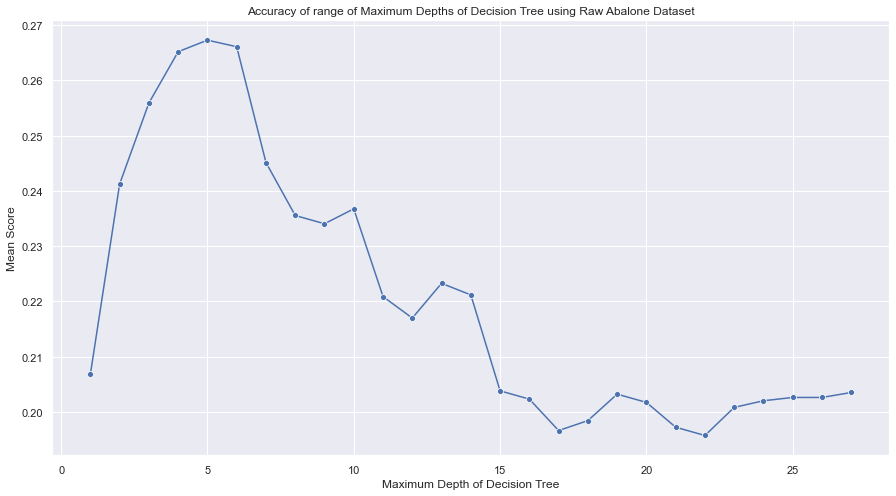

In [119]:
# initialize the plot
sns.set(rc = {'figure.figsize':(15,8)})

# assign the datapoints for the axes
sns.lineplot(data= abalone_raw_tree_cv_results, x="Maximum Depth of Decision Tree", y="Mean Score",marker="o")

# assign the graph title
plt.title("Accuracy of range of Maximum Depths of Decision Tree using Raw Abalone Dataset")

__PCA Dataset__

In [120]:
# generate a dataframe of the maximum depth and the respective score
abalone_pca_tree_cv_results = pd.DataFrame([abalone_pca_tree_cv.cv_results_['param_max_depth'],abalone_pca_tree_cv.cv_results_['mean_test_score']])

# transpose the dataframe
abalone_pca_tree_cv_results = abalone_pca_tree_cv_results.T

# name the columns of the dataframe
abalone_pca_tree_cv_results.columns = ["Maximum Depth of Decision Tree","Mean Score"]

Text(0.5, 1.0, 'Accuracy of range of Maximum Depths of Decision Tree using PCA Abalone Dataset')

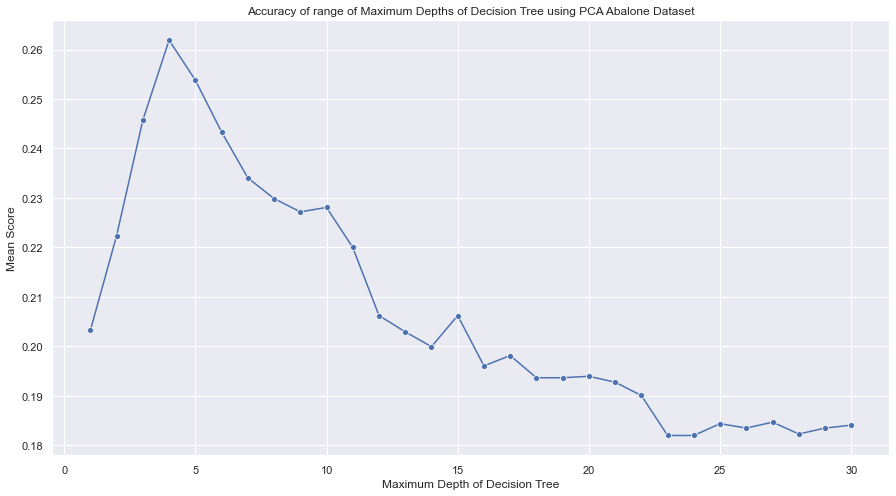

In [121]:
# initialize the t-SNE plot
sns.set(rc = {'figure.figsize':(15,8)})

# assign the datapoints for the axes
sns.lineplot(data= abalone_pca_tree_cv_results, x="Maximum Depth of Decision Tree", y="Mean Score",marker="o")

# assign the graph title
plt.title("Accuracy of range of Maximum Depths of Decision Tree using PCA Abalone Dataset")

__LDA Dataset__

In [122]:
# generate a dataframe of the maximum depth and the respective score
abalone_lda_tree_cv_results = pd.DataFrame([abalone_lda_tree_cv.cv_results_['param_max_depth'],abalone_lda_tree_cv.cv_results_['mean_test_score']])

# transpose the dataframe
abalone_lda_tree_cv_results = abalone_lda_tree_cv_results.T

# name the columns of the dataframe
abalone_lda_tree_cv_results.columns = ["Maximum Depth of Decision Tree","Mean Score"]

Text(0.5, 1.0, 'Accuracy of range of Maximum Depths of Decision Tree using LDA Abalone Dataset')

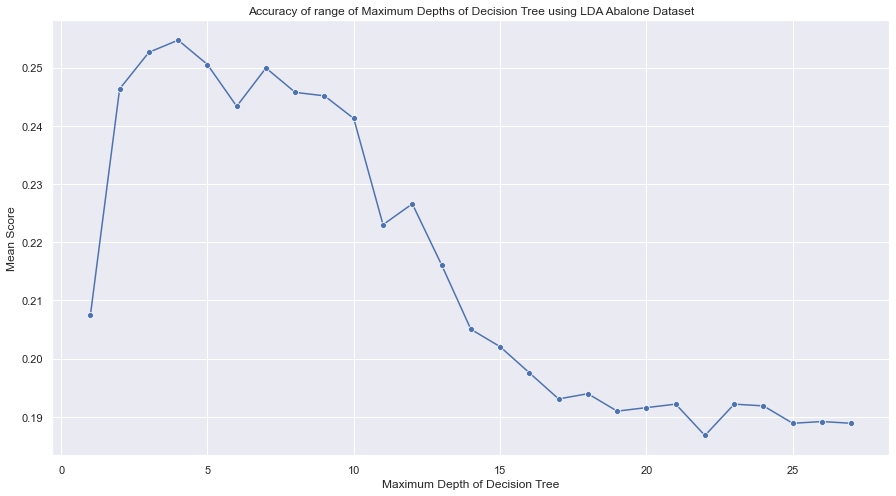

In [123]:
# initialize the t-SNE plot
sns.set(rc = {'figure.figsize':(15,8)})

# assign the datapoints for the axes
sns.lineplot(data= abalone_lda_tree_cv_results, x="Maximum Depth of Decision Tree", y="Mean Score",marker="o")

# assign the graph title
plt.title("Accuracy of range of Maximum Depths of Decision Tree using LDA Abalone Dataset")

##### 3.2.2 Wine Dataset

__Raw Dataset__

In [124]:
# generate a dataframe of the maximum depth and the respective score
wine_raw_tree_cv_results = pd.DataFrame([wine_raw_tree_cv.cv_results_['param_max_depth'],wine_raw_tree_cv.cv_results_['mean_test_score']])

# transpose the dataframe
wine_raw_tree_cv_results = wine_raw_tree_cv_results.T

# name the columns of the dataframe
wine_raw_tree_cv_results.columns = ["Maximum Depth of Decision Tree","Mean Score"]

Text(0.5, 1.0, 'Accuracy of range of Maximum Depths of Decision Tree using Raw Wine Dataset')

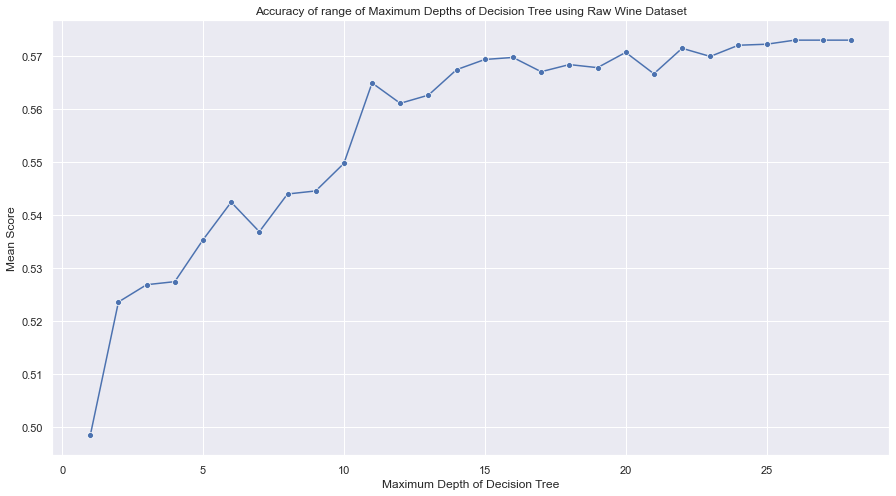

In [125]:
# initialize the plot
sns.set(rc = {'figure.figsize':(15,8)})

# assign the datapoints for the axes
sns.lineplot(data= wine_raw_tree_cv_results, x="Maximum Depth of Decision Tree", y="Mean Score",marker="o")

# assign the graph title
plt.title("Accuracy of range of Maximum Depths of Decision Tree using Raw Wine Dataset")

__PCA Dataset__

In [126]:
# generate a dataframe of the maximum depth and the respective score
wine_pca_tree_cv_results = pd.DataFrame([wine_pca_tree_cv.cv_results_['param_max_depth'],wine_pca_tree_cv.cv_results_['mean_test_score']])

# transpose the dataframe
wine_pca_tree_cv_results = wine_pca_tree_cv_results.T

# name the columns of the dataframe
wine_pca_tree_cv_results.columns = ["Maximum Depth of Decision Tree","Mean Score"]

Text(0.5, 1.0, 'Accuracy of range of Maximum Depths of Decision Tree using PCA Wine Dataset')

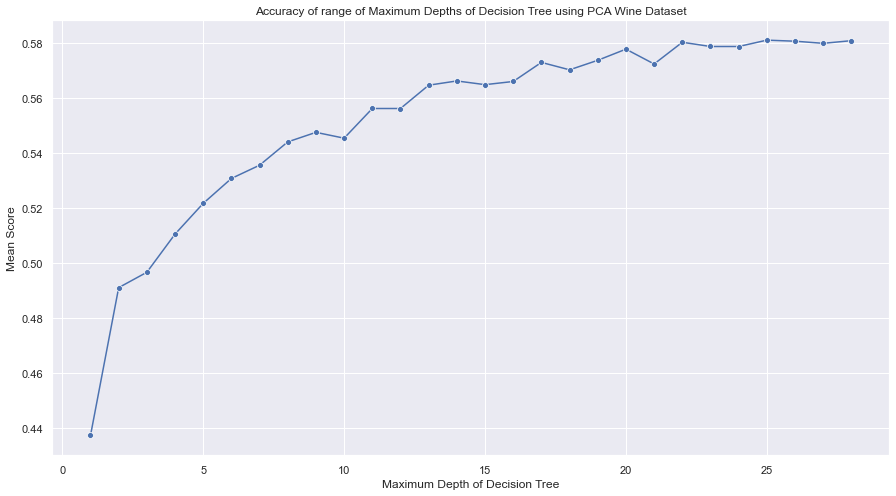

In [127]:
# initialize the t-SNE plot
sns.set(rc = {'figure.figsize':(15,8)})

# assign the datapoints for the axes
sns.lineplot(data= wine_pca_tree_cv_results, x="Maximum Depth of Decision Tree", y="Mean Score",marker="o")

# assign the graph title
plt.title("Accuracy of range of Maximum Depths of Decision Tree using PCA Wine Dataset")

__LDA Dataset__

In [128]:
# generate a dataframe of the maximum depth and the respective score
wine_lda_tree_cv_results = pd.DataFrame([wine_lda_tree_cv.cv_results_['param_max_depth'],wine_lda_tree_cv.cv_results_['mean_test_score']])

# transpose the dataframe
wine_lda_tree_cv_results = wine_lda_tree_cv_results.T

# name the columns of the dataframe
wine_lda_tree_cv_results.columns = ["Maximum Depth of Decision Tree","Mean Score"]

Text(0.5, 1.0, 'Accuracy of range of Maximum Depths of Decision Tree using LDA Wine Dataset')

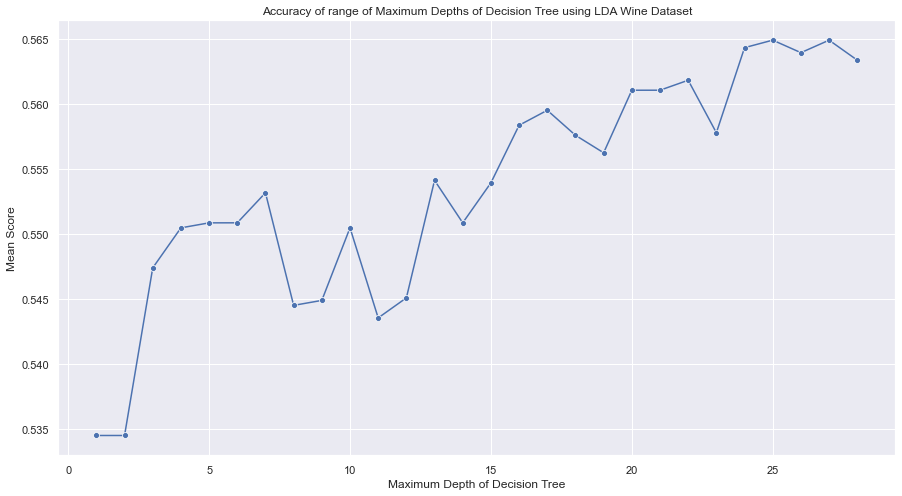

In [129]:
# initialize the t-SNE plot
sns.set(rc = {'figure.figsize':(15,8)})

# assign the datapoints for the axes
sns.lineplot(data= wine_lda_tree_cv_results, x="Maximum Depth of Decision Tree", y="Mean Score",marker="o")

# assign the graph title
plt.title("Accuracy of range of Maximum Depths of Decision Tree using LDA Wine Dataset")

#### 3.3 Interpretability

##### 3.3.1 Abalone Dataset

We will plot the first 3 layers of the decision tree as shown below:

[Text(0.5, 0.9, 'X[6] <= 0.143\ngini = 0.894\nsamples = 3341\nvalue = [1, 1, 10, 46, 87, 202, 310, 453, 557, 520, 387\n212, 166, 98, 77, 54, 50, 33, 27, 22, 13, 3, 5\n2, 1, 1, 2, 1]'),
 Text(0.25, 0.7, 'X[1] <= 0.282\n0.836\n912\n[1, 1, 10, 46, 87, 186, 240, 152, 88, 53, 16, 15\n9, 2, 2, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0]'),
 Text(0.125, 0.5, 'X[6] <= 0.02\n0.756\n172\n[1, 1, 10, 42, 59, 41, 13, 5, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0]'),
 Text(0.0625, 0.3, 'X[3] <= 0.004\n0.689\n74\n[1, 1, 10, 35, 18, 7, 2, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'X[3] <= 0.038\n0.684\n98\n[0, 0, 0, 7, 41, 34, 11, 5, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'X[6] <= 0.093\n0.806\n740\n[0, 0, 0, 4, 28, 145, 227, 147, 88, 53, 16, 15\n9, 2, 2, 3,

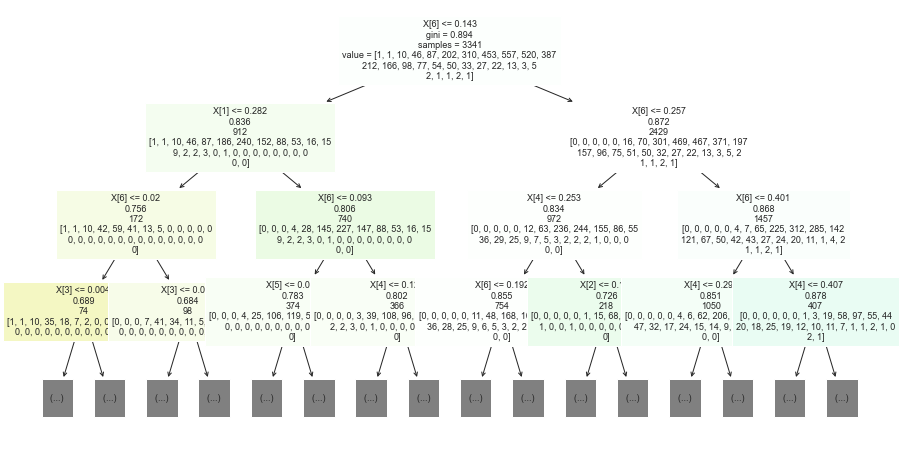

In [130]:
plot_tree(abalone_raw_tree, max_depth = 3, filled = True, fontsize=9, label="root")

Based on the plot of the decision tree, the first node is "Shell Weight (g)" and the threshold is 0.143. The original samples are 3341 and after the first split, samples that are less than 0.143, there are 912 samples and for samples that are more than the threshold, there are 2429 samples. 

On the right hand side of the tree, after the root node, "Shell Weight (g)" is used consecutively for the nodes. 

To determine which feature was used for nodes in the tree, we will execute the following code:

In [131]:
# initialize an array to store the feature name
abalone_raw_node_features = []

# initialize a for loop that will run through the node feature of the tree
for i in range(0,len(abalone_raw_tree.tree_.feature)):
    
    # condition to remove all the leaves
    if (abalone_raw_tree.tree_.feature[i] >= 0):

        # add the feature to the array
        abalone_raw_node_features.append(abalone_raw_train.columns[abalone_raw_tree.tree_.feature[i]])

# remove duplicate values from the array by using "set"
set(abalone_raw_node_features)

{'Diameter (mm)',
 'Height (mm)',
 'Length (mm)',
 'Shell Weight (g)',
 'Shucked Weight (g)',
 'Viscera Weight (g)',
 'Whole Weight (g)'}

All the features were used for the decision tree

Now we will determine, how many times was each feature was used for a node.

In [132]:
abalone_node_f = pd.DataFrame(np.unique(abalone_raw_node_features, return_counts=True))
abalone_node_f = abalone_node_f.T
abalone_node_f.columns = ["Features", "Frequency"]
abalone_node_f

,Features,Frequency
0,Diameter (mm),1
1,Height (mm),1
2,Length (mm),2
3,Shell Weight (g),11
4,Shucked Weight (g),9
5,Viscera Weight (g),5
6,Whole Weight (g),2


Shell weight was used the most, followed by Shucked Weight (g). Based on observations made on the dataset, the features with the highest variance and with the least impurity was used the most. In this case that is Shell Weight.

##### 3.3.2 Wine Dataset

We will plot the first 3 layers of the decision tree as shown below:

[Text(0.5, 0.9, 'X[10] <= 0.307\ngini = 0.672\nsamples = 5197\nvalue = [23, 169, 1704, 2266, 881, 150, 4]'),
 Text(0.25, 0.7, 'X[1] <= 0.138\n0.589\n2402\n[12, 93, 1235, 904, 138, 20, 0]'),
 Text(0.125, 0.5, 'X[1] <= 0.097\n0.618\n1095\n[4, 25, 399, 533, 116, 18, 0]'),
 Text(0.0625, 0.3, 'X[10] <= 0.109\n0.626\n518\n[3, 8, 132, 275, 83, 17, 0]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'X[4] <= 0.061\n0.582\n577\n[1, 17, 267, 258, 33, 1, 0]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'X[10] <= 0.254\n0.507\n1307\n[8, 68, 836, 371, 22, 2, 0]'),
 Text(0.3125, 0.3, 'X[9] <= 0.199\n0.467\n989\n[5, 48, 675, 252, 9, 0, 0]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'X[1] <= 0.31\n0.598\n318\n[3, 20, 161, 119, 13, 2, 0]'),
 Text(0.40625, 0.1, '\n  (...)  \n'),
 Text(0.46875, 0.1, '\n  (...)  \n'),
 Text(0.75, 0.7, 'X[10] <= 0.504\n0.

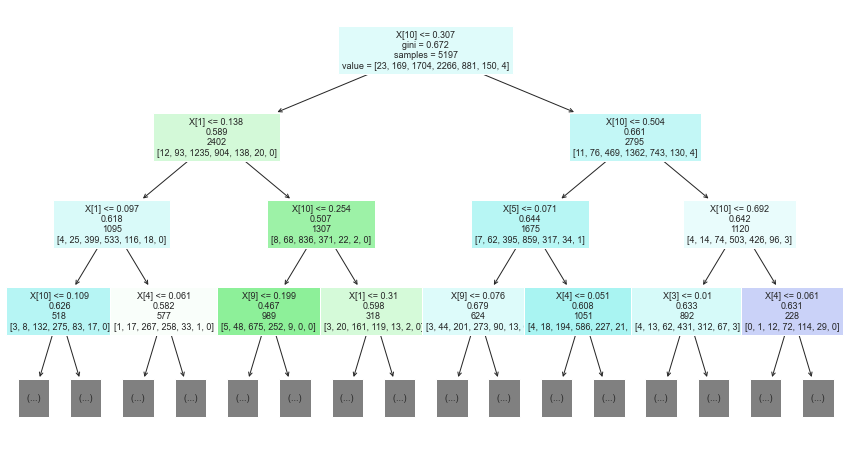

In [133]:
plot_tree(wine_raw_tree, max_depth = 3, filled = True, fontsize=9, label="root")

To determine which feature was used for nodes in the tree, we will execute the following code:

In [134]:
# initialize an array to store the feature name
wine_raw_node_features = []

# initialize a for loop that will run through the node feature of the tree
for i in range(0,len(wine_raw_tree.tree_.feature)):
    
    # condition to remove all the leaves
    if (wine_raw_tree.tree_.feature[i] >= 0):

        # add the feature to the array
        wine_raw_node_features.append(wine_raw_train.columns[wine_raw_tree.tree_.feature[i]])

# remove duplicate values from the array by using "set"
set(wine_raw_node_features)

{'alcohol',
 'chlorides',
 'citric acid',
 'density',
 'fixed acidity',
 'free sulfur dioxide',
 'pH',
 'residual sugar',
 'sulphates',
 'total sulfur dioxide',
 'volatile acidity'}

All the features were used for the decision tree

Now we will determine, how many times was each feature was used for a node.

In [135]:
wine_node_f = pd.DataFrame(np.unique(wine_raw_node_features, return_counts=True))
wine_node_f = wine_node_f.T
wine_node_f.columns = ["Features", "Frequency"]
wine_node_f

,Features,Frequency
0,alcohol,103
1,chlorides,126
2,citric acid,130
3,density,132
4,fixed acidity,123
5,free sulfur dioxide,131
6,pH,139
7,residual sugar,111
8,sulphates,139
9,total sulfur dioxide,145


Total sulfur dioxide has been used the most followed by sulphates. In the case of wine dataset, almost all the feaures have been used almost the same for the best decision tree.

## Question 4: Random Forest Classifier

#### 4.1 Random Forest using Cross Validation

##### 4.1.1 Abalone Dataset 

For the maximum depth of the tree in the random forest classifier, we will use the same that was used in the decision tree algorithm, which for the case of abalone is 30

__Normalized Data__

In [136]:
# create an array for the maximum depths for the classifier parameters
abalone_rf_tree_depth = list(range(2,29,5))

# create an array for the number of estimators for the classifier parameters
abalone_rf_no_estimators = list(range(3,304,50))

# generate a dictionary for the parameters of random forest classifier
parameters = {"n_estimators": abalone_rf_no_estimators ,"max_depth":abalone_rf_tree_depth}

# initialize the GridSearchCV function
abalone_raw_rforest_cv = GridSearchCV(RandomForestClassifier(random_state=27), parameters, cv = 5)

# fit the training data using the GridSearchCV function
abalone_raw_rforest_cv.fit(abalone_raw_train , abalone_rings_raw_train)

# display the results of the tuning of the hyperprameters
abalone_raw_rforest_cv.cv_results_

C:\Users\ibteh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'mean_fit_time': array([0.02920032, 0.32559977, 0.45640097, 1.00611014, 1.1062005 ,
        1.11459751, 1.30387034, 0.02599974, 0.35440016, 0.68439889,
        1.34880009, 1.39919815, 1.73865833, 2.06006455, 0.03339863,
        0.55169487, 1.0028904 , 1.57759819, 2.15739679, 2.56020422,
        2.95519962, 0.03819833, 0.60119739, 1.17199512, 1.75299568,
        2.29639993, 2.87439766, 3.43379989, 0.041399  , 0.63759656,
        1.24139895, 1.90270929, 2.85660133, 2.97440267, 3.59946661,
        0.03679919, 0.56121721, 1.51134896, 2.6738812 , 2.45005093,
        3.05146766, 3.65519962]),
 'std_fit_time': array([0.00823396, 0.06132626, 0.11103798, 0.28454887, 0.1749676 ,
        0.06264533, 0.08328069, 0.00369056, 0.00313549, 0.01578433,
        0.10570407, 0.07257194, 0.08069443, 0.04430974, 0.00300662,
        0.06787973, 0.01460739, 0.0966318 , 0.23926468, 0.1335484 ,
        0.05096738, 0.00299156, 0.01041068, 0.02673519, 0.05450596,
        0.04909119, 0.05852327, 0.06387856, 0.005

The best hyperparameters for the random forest classifier are:

In [137]:
abalone_raw_rforest_cv.best_params_

{'max_depth': 7, 'n_estimators': 303}

The score achieved by the best hyperparameters is:

In [138]:
abalone_raw_rforest_cv.best_score_

0.26638695702764875

Now we will initialize a new random forest and train it with the best hyperparameters that were discovered by GridSearchCV

In [139]:
# initialize the decision tree classifier with the best hyperparemeter
abalone_raw_rforest = RandomForestClassifier(random_state=27, max_depth = 7, n_estimators = 303)

# train the classifier using the training dataset
abalone_raw_rforest.fit(abalone_raw_train, abalone_rings_raw_train)

# view the accuracy of the classifier using the testing dataset
abalone_raw_rforest_test_accuracy = abalone_raw_rforest.score(abalone_raw_test, abalone_rings_raw_test)
abalone_raw_rforest_test_accuracy

0.27751196172248804

__PCA Data__

In [140]:
# create an array for the maximum depths for the classifier parameters
abalone_rf_tree_depth = list(range(2,29,5))

# create an array for the number of estimators for the classifier parameters
abalone_rf_no_estimators = list(range(3,304,50))

# generate a dictionary for the parameters of random forest classifier
parameters = {"n_estimators": abalone_rf_no_estimators ,"max_depth":abalone_rf_tree_depth}

# initialize the GridSearchCV function
abalone_pca_rforest_cv = GridSearchCV(RandomForestClassifier(random_state=27), parameters, cv = 5)

# fit the training data using the GridSearchCV function
abalone_pca_rforest_cv.fit(abalone_PCAminmax_train , abalone_rings_PCAminmax_train)

# display the results of the tuning of the hyperprameters
abalone_pca_rforest_cv.cv_results_

C:\Users\ibteh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'mean_fit_time': array([0.02039742, 0.23239756, 0.467801  , 0.66840153, 1.29219942,
        1.22199888, 1.64916921, 0.02280002, 0.37404709, 0.83038921,
        0.91931243, 1.33200035, 1.92230968, 2.52960382, 0.02619896,
        0.43100452, 0.77979913, 1.14399853, 1.67059984, 1.89279566,
        2.25239944, 0.02939568, 0.4542007 , 0.90419927, 1.32359543,
        1.77619953, 2.20180178, 2.62940164, 0.03219938, 0.48139844,
        0.92380095, 1.36240048, 2.0432024 , 2.37559967, 3.04439936,
        0.02859497, 0.47840042, 0.9718008 , 1.48659911, 2.01679931,
        3.22200289, 4.29879708]),
 'std_fit_time': array([1.85505814e-03, 1.47171994e-02, 5.56705374e-02, 2.12360665e-02,
        2.58152255e-01, 1.69389309e-01, 1.22132620e-01, 3.86508194e-04,
        3.55053614e-02, 1.57143054e-01, 1.57956042e-02, 2.10014070e-01,
        3.67352948e-01, 2.87370936e-01, 7.49144875e-04, 5.17222118e-02,
        2.36752914e-02, 1.89992012e-02, 1.98751006e-01, 5.46786812e-02,
        3.69688955e-02, 1.201

The best hyperparameters for the random forest classifier are:

In [141]:
abalone_pca_rforest_cv.best_params_

{'max_depth': 7, 'n_estimators': 153}

The score achieved by the best hyperparameters is:

In [142]:
abalone_pca_rforest_cv.best_score_

0.2648912936458921

Now we will initialize a new random forest and train it with the best hyperparameters that were discovered by GridSearchCV

In [143]:
# initialize the decision tree classifier with the best hyperparemeter
abalone_pca_rforest = RandomForestClassifier(random_state = 27, max_depth = 7, n_estimators = 153)

# train the classifier using the training dataset
abalone_pca_rforest.fit(abalone_PCAminmax_train , abalone_rings_PCAminmax_train)

# view the accuracy of the classifier using the testing dataset
abalone_pca_rforest_test_accuracy = abalone_pca_rforest.score(abalone_PCAminmax_test , abalone_rings_PCAminmax_test)
abalone_pca_rforest_test_accuracy

0.2619617224880383

The performance of the best classifier on the test data is shown below:

In [144]:
abalone_pca_rforest_cv.score(abalone_PCAminmax_test , abalone_rings_PCAminmax_test)

0.2619617224880383

__LDA Data__

In [145]:
# create an array for the maximum depths for the classifier parameters
abalone_rf_tree_depth = list(range(2,29,5))

# create an array for the number of estimators for the classifier parameters
abalone_rf_no_estimators = list(range(3,304,50))

# generate a dictionary for the parameters of random forest classifier
parameters = {"n_estimators": abalone_rf_no_estimators ,"max_depth":abalone_rf_tree_depth}

# initialize the GridSearchCV function
abalone_lda_rforest_cv = GridSearchCV(RandomForestClassifier(random_state=27), parameters, cv = 5)

# fit the training data using the GridSearchCV function
abalone_lda_rforest_cv.fit(abalone_LDAminmax_train , abalone_rings_LDAminmax_train)

# display the results of the tuning of the hyperprameters
abalone_lda_rforest_cv.cv_results_

C:\Users\ibteh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'mean_fit_time': array([0.04600086, 0.43015275, 0.61660147, 1.06480513, 1.44069471,
        1.50584741, 1.28799701, 0.02659788, 0.40119548, 0.79299679,
        1.18599977, 1.52416244, 2.54640102, 2.54899688, 0.04059763,
        0.60559535, 1.10579767, 1.62319927, 2.40600142, 4.26320066,
        3.23499875, 0.03759627, 0.70961456, 1.21199837, 2.02299919,
        2.44159851, 2.99220014, 3.61460094, 0.03939624, 0.70500059,
        1.66780062, 2.56339669, 3.0579988 , 3.76700025, 4.47980156,
        0.0463974 , 0.77199936, 1.52059784, 2.24739985, 3.01720123,
        3.84799843, 4.50860052]),
 'std_fit_time': array([4.19734331e-03, 1.28176668e-01, 6.19270880e-02, 1.82155996e-01,
        5.33139589e-01, 2.59379570e-01, 7.16775261e-02, 8.01516920e-04,
        1.02801721e-02, 2.88046502e-02, 5.75231966e-02, 2.32663435e-02,
        2.69752856e-01, 5.92348596e-02, 2.57767052e-03, 2.64200160e-02,
        3.30048731e-02, 2.15716885e-02, 2.10744921e-01, 1.02706893e+00,
        4.34162485e-02, 4.899

The best hyperparameters for the random forest classifier are:

In [146]:
abalone_lda_rforest_cv.best_params_

{'max_depth': 7, 'n_estimators': 203}

The score achieved by the best hyperparameters is:

In [147]:
abalone_lda_rforest_cv.best_score_

0.2642942813923722

Now we will initialize a new random forest and train it with the best hyperparameters that were discovered by GridSearchCV

In [148]:
# initialize the decision tree classifier with the best hyperparemeter
abalone_lda_rforest = RandomForestClassifier(random_state=27, max_depth= 7, n_estimators =203)

# train the classifier using the training dataset
abalone_lda_rforest.fit(abalone_LDAminmax_train , abalone_rings_LDAminmax_train)

# view the accuracy of the classifier using the testing dataset
abalone_lda_rforest_test_accuracy = abalone_lda_rforest.score(abalone_LDAminmax_test , abalone_rings_LDAminmax_test)
abalone_lda_rforest_test_accuracy

0.034688995215311005

The performance of the best classifier on the test data is shown below:

In [149]:
abalone_lda_rforest_cv.score(abalone_LDAminmax_test , abalone_rings_LDAminmax_test)

0.034688995215311005

##### 4.1.2 Wine Dataset 

For the maximum depth of the tree in the random forest classifier, we will use the same that was used in the decision tree algorithm, which for the case of abalone is 29

__Normalized Data__

In [150]:
# create an array for the maximum depths for the classifier parameters
wine_rf_tree_depth = list(range(2,29,5))

# create an array for the number of estimators for the classifier parameters
wine_rf_no_estimators = list(range(3,304,50))

# generate a dictionary for the parameters of random forest classifier
parameters = {"n_estimators": wine_rf_no_estimators ,"max_depth":wine_rf_tree_depth}

# initialize the GridSearchCV function
wine_raw_rforest_cv = GridSearchCV(RandomForestClassifier(random_state=27), parameters, cv = 5)

# fit the training data using the GridSearchCV function
wine_raw_rforest_cv.fit(wine_raw_train, wine_quality_raw_train)

# display the results of the tuning of the hyperprameters
wine_raw_rforest_cv.cv_results_

C:\Users\ibteh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'mean_fit_time': array([0.0269968 , 0.36440148, 0.53979983, 0.8727993 , 1.04219689,
        1.2815969 , 1.95507488, 0.02679663, 0.63739748, 0.9133996 ,
        1.3613946 , 1.74179649, 2.3437993 , 5.21472845, 0.08600268,
        1.20556479, 1.70350971, 2.93145046, 3.75150547, 3.16403623,
        4.09785953, 0.04059701, 0.73152261, 1.42319961, 2.0618145 ,
        3.2621139 , 3.7813024 , 4.25960264, 0.0445962 , 0.70379715,
        1.37039862, 2.08679957, 2.81000051, 3.63203974, 4.2397994 ,
        0.05259709, 0.73739629, 1.42519302, 2.14519687, 2.79499717,
        3.57080026, 4.20831242]),
 'std_fit_time': array([7.01610879e-03, 3.54831113e-02, 6.09958496e-02, 2.02213524e-01,
        9.31178110e-02, 5.26354305e-02, 4.07759278e-01, 4.00982156e-04,
        1.56175185e-01, 2.23330995e-02, 4.71362233e-02, 6.27556047e-02,
        1.17624808e-01, 1.01416218e+00, 3.82661696e-02, 3.50318898e-01,
        4.28410846e-01, 7.28126852e-01, 6.99654145e-01, 2.19343482e-01,
        5.82148727e-01, 4.909

The best hyperparameters for the random forest classifier are:

In [151]:
wine_raw_rforest_cv.best_params_

{'max_depth': 27, 'n_estimators': 303}

The score achieved by the best hyperparameters is:

In [152]:
wine_raw_rforest_cv.best_score_

0.6726932331383727

Now we will initialize a new random forest and train it with the best hyperparameters that were discovered by GridSearchCV

In [153]:
# initialize the decision tree classifier with the best hyperparemeter
wine_raw_rforest = RandomForestClassifier(random_state=27, max_depth= 27, n_estimators =303)

# train the classifier using the training dataset
wine_raw_rforest.fit(wine_raw_train, wine_quality_raw_train)

# view the accuracy of the classifier using the testing dataset
wine_raw_rforest_test_accuracy = wine_raw_rforest.score(wine_raw_test, wine_quality_raw_test)
wine_raw_rforest_test_accuracy

0.693076923076923

__PCA Data__

In [154]:
# create an array for the maximum depths for the classifier parameters
wine_rf_tree_depth = list(range(2,29,5))

# create an array for the number of estimators for the classifier parameters
wine_rf_no_estimators = list(range(3,304,50))

# generate a dictionary for the parameters of random forest classifier
parameters = {"n_estimators": wine_rf_no_estimators ,"max_depth":wine_rf_tree_depth}

# initialize the GridSearchCV function
wine_pca_rforest_cv = GridSearchCV(RandomForestClassifier(random_state=27), parameters, cv = 5)

# fit the training data using the GridSearchCV function
wine_pca_rforest_cv.fit(wine_PCAminmax_train , wine_quality_PCAminmax_train)

# display the results of the tuning of the hyperprameters
wine_pca_rforest_cv.cv_results_

C:\Users\ibteh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'mean_fit_time': array([0.0293386 , 0.33899903, 0.85815787, 1.19396515, 2.07988586,
        1.70418487, 1.447997  , 0.03099771, 0.49419742, 0.96979809,
        1.3900013 , 1.83339744, 2.35402308, 2.79080224, 0.04039707,
        0.6595973 , 1.2640007 , 1.9623807 , 2.53460021, 3.45101647,
        4.30859838, 0.05139632, 0.78760109, 1.64979658, 2.24699645,
        3.01580181, 4.26739635, 5.48439426, 0.05020041, 0.83520155,
        1.65920296, 2.45740004, 3.15911326, 5.12519898, 5.74455075,
        0.05400057, 1.06720161, 1.55759401, 2.81300211, 3.09140277,
        3.83979974, 4.44140396]),
 'std_fit_time': array([3.87339488e-03, 5.34231810e-02, 9.79205041e-02, 3.97553895e-01,
        4.64708905e-01, 1.19673936e-01, 1.84714053e-02, 4.29524156e-06,
        2.42455311e-02, 6.39912929e-02, 1.57876900e-02, 4.55686186e-02,
        7.37385935e-02, 7.36562393e-02, 4.90353182e-04, 8.38240824e-03,
        1.53746094e-02, 7.78739030e-02, 4.15233229e-02, 5.37343117e-01,
        3.68112641e-01, 1.049

The best hyperparameters for the random forest classifier are:

In [155]:
wine_pca_rforest_cv.best_params_

{'max_depth': 17, 'n_estimators': 253}

The score achieved by the best hyperparameters is:

In [156]:
wine_pca_rforest_cv.best_score_

0.6540268009180424

Now we will initialize a new random forest and train it with the best hyperparameters that were discovered by GridSearchCV

In [157]:
# initialize the decision tree classifier with the best hyperparemeter
wine_pca_rforest = RandomForestClassifier(random_state=27, max_depth= 17, n_estimators= 253)

# train the classifier using the training dataset
wine_pca_rforest.fit(wine_PCAminmax_train , wine_quality_PCAminmax_train)

# view the accuracy of the classifier using the testing dataset
wine_pca_rforest_test_accuracy = wine_pca_rforest.score(wine_PCAminmax_test , wine_quality_PCAminmax_test)
wine_pca_rforest_test_accuracy

0.5

The performance of the best classifier on the test data is shown below:

In [158]:
wine_pca_rforest_cv.score(wine_PCAminmax_test , wine_quality_PCAminmax_test)

0.5

__LDA Data__

In [159]:
# create an array for the maximum depths for the classifier parameters
wine_rf_tree_depth = list(range(2,29,5))

# create an array for the number of estimators for the classifier parameters
wine_rf_no_estimators = list(range(3,304,50))

# generate a dictionary for the parameters of random forest classifier
parameters = {"n_estimators": wine_rf_no_estimators ,"max_depth":wine_rf_tree_depth}

# initialize the GridSearchCV function
wine_lda_rforest_cv = GridSearchCV(RandomForestClassifier(random_state=27), parameters, cv = 5)

# fit the training data using the GridSearchCV function
wine_lda_rforest_cv.fit(wine_LDAminmax_train , wine_quality_LDAminmax_train)

# display the results of the tuning of the hyperprameters
wine_lda_rforest_cv.cv_results_

C:\Users\ibteh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'mean_fit_time': array([0.03079834, 0.23559966, 0.55119777, 0.6977983 , 0.8651978 ,
        1.12619972, 1.28719468, 0.02359829, 0.33839946, 0.67139678,
        1.1885983 , 1.60179653, 2.56990414, 2.1139998 , 0.0335988 ,
        0.44520082, 0.86780028, 1.3507967 , 1.84000306, 2.13780241,
        2.61779895, 0.0333971 , 0.56859941, 1.07020245, 1.55939856,
        2.02959924, 2.58819723, 3.13519559, 0.05260262, 0.73100076,
        1.23540158, 1.92443185, 2.5263772 , 4.1754921 , 3.84675875,
        0.03819814, 0.66760149, 1.36620069, 1.71219964, 2.44239836,
        3.23840113, 3.87420149]),
 'std_fit_time': array([2.71158272e-03, 1.75881153e-02, 9.83863465e-02, 6.60308888e-02,
        5.83329588e-02, 1.11598580e-01, 9.19455819e-02, 1.02110074e-03,
        2.57676450e-03, 3.43729160e-02, 3.71334792e-01, 2.38280220e-01,
        5.39820607e-01, 2.47839432e-01, 7.91259904e-03, 9.49420497e-03,
        7.73060271e-03, 1.12023795e-01, 3.43102350e-01, 6.66578321e-02,
        5.91271942e-02, 1.021

The best hyperparameters for the random forest classifier are:

In [160]:
wine_lda_rforest_cv.best_params_

{'max_depth': 17, 'n_estimators': 303}

The score achieved by the best hyperparameters is:

In [161]:
wine_lda_rforest_cv.best_score_

0.6345948397127417

Now we will initialize a new random forest and train it with the best hyperparameters that were discovered by GridSearchCV

In [162]:
# initialize the decision tree classifier with the best hyperparemeter
wine_lda_rforest = RandomForestClassifier(random_state=27, max_depth= 17, n_estimators = 303)

# train the classifier using the training dataset
wine_lda_rforest.fit(wine_LDAminmax_train , wine_quality_LDAminmax_train)

# view the accuracy of the classifier using the testing dataset
wine_lda_rforest_test_accuracy = wine_lda_rforest.score(wine_LDAminmax_test , wine_quality_LDAminmax_test)
wine_lda_rforest_test_accuracy

0.4530769230769231

The performance of the best classifier on the test data is shown below:

In [163]:
wine_lda_rforest_cv.score(wine_LDAminmax_test , wine_quality_LDAminmax_test)

0.4530769230769231

#### 4.2 Heatmap Plot of Mean Score

##### 4.2.1 Abalone Dataset

###### 4.2.1.1 Raw Dataset

We will generate the heatmap using the mean test score which was generated by GridSearchCV using the training data as shown below

In [164]:
abalone_raw_rforest_meanscore = abalone_raw_rforest_cv.cv_results_["mean_test_score"]

the total number of elements in the array is 

In [165]:
len(abalone_raw_rforest_meanscore)

42

The mean test score of the random forest is arranged with respect to depth first. For our scenerio, 6 maximum depths were used and 7 number of estimators were tried. The total mean test scores produced are 42. We will reshape the array in 7 by 6 to generate the heatmap as shown below: 

In [166]:
# save the array using a pandas DataFrame and provide the column names
abalone_raw_heatmap_array = pd.DataFrame(abalone_raw_rforest_meanscore.reshape(7,6), columns = ["MD 2","MD 7","MD 12","MD 17","MD 22","MD 27"])

# add the index column which is the Number of Estimators
abalone_raw_heatmap_array["No. of Estimator"]= [3, 53, 103, 153, 203, 253, 303]

# set the Number of Estimators as the index column
abalone_raw_heatmap_array.set_index("No. of Estimator", inplace=True)

Now we will preview the data as shown below:

In [167]:
abalone_raw_heatmap_array

,MD 2,MD 7,MD 12,MD 17,MD 22,MD 27
No. of Estimator,,,,,,
3,0.257706,0.257402,0.257702,0.257701,0.258002,0.258302
53,0.257104,0.237359,0.256508,0.261595,0.263692,0.261298
103,0.264292,0.266387,0.218494,0.253817,0.256507,0.258904
153,0.260400,0.259502,0.260998,0.202930,0.242435,0.246033
203,0.245137,0.248728,0.250521,0.252316,0.208319,0.242442
253,0.244539,0.246032,0.243340,0.245435,0.249027,0.204425
303,0.240045,0.246931,0.246336,0.245136,0.246034,0.249328


Now we will generate the heatmap using seaborn as shown below:

Text(0.5, 1.0, 'Heatmap showing the accuracy between Number of Estimators and Maximum Depth using Raw Abalone Data')

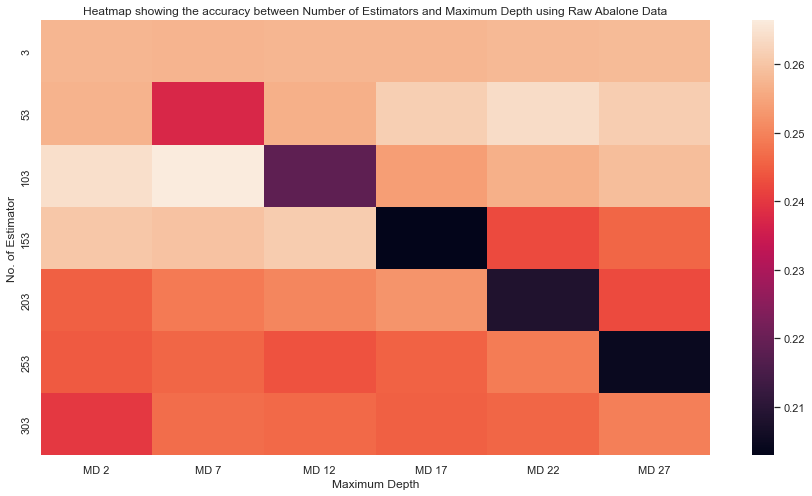

In [168]:
# initialize the heat map using the heatmap array dataset
sns.heatmap(abalone_raw_heatmap_array)

plt.xlabel("Maximum Depth")

plt.title("Heatmap showing the accuracy between Number of Estimators and Maximum Depth using Raw Abalone Data")

###### 4.2.1.2 PCA Dataset

We will generate the heatmap using the mean test score which was generated by GridSearchCV using the training data as shown below

In [169]:
abalone_pca_rforest_meanscore = abalone_pca_rforest_cv.cv_results_["mean_test_score"]

the total number of elements in the array is 

In [170]:
len(abalone_pca_rforest_meanscore)

42

The mean test score of the random forest is arranged with respect to depth first. For our scenerio, 6 maximum depths were used and 7 number of estimators were tried. The total mean test scores produced are 42. We will reshape the array in 7 by 6 to generate the heatmap as shown below: 

In [171]:
# save the array using a pandas DataFrame and provide the column names
abalone_pca_heatmap_array = pd.DataFrame(abalone_pca_rforest_meanscore.reshape(7,6), columns = ["MD 2","MD 7","MD 12","MD 17","MD 22","MD 27"])

# add the index column which is the Number of Estimators
abalone_pca_heatmap_array["No. of Estimator"]= [3, 53, 103, 153, 203, 253, 303]

# set the Number of Estimators as the index column
abalone_pca_heatmap_array.set_index("No. of Estimator", inplace=True)

Now we will preview the data as shown below:

In [172]:
abalone_pca_heatmap_array

,MD 2,MD 7,MD 12,MD 17,MD 22,MD 27
No. of Estimator,,,,,,
3,0.235562,0.245743,0.240652,0.240653,0.240653,0.240952
53,0.240952,0.238253,0.252920,0.255314,0.264891,0.264292
103,0.263994,0.264890,0.217302,0.240941,0.242736,0.242140
153,0.243935,0.241842,0.240945,0.197250,0.225674,0.232861
203,0.233460,0.233758,0.229565,0.228368,0.208024,0.228972
253,0.232261,0.234954,0.234655,0.234356,0.233159,0.201736
303,0.236454,0.235253,0.236451,0.232262,0.230765,0.232561


Now we will generate the heatmap using seaborn as shown below:

Text(0.5, 1.0, 'Heatmap showing the accuracy between Number of Estimators and Maximum Depth using PCA Abalone Data')

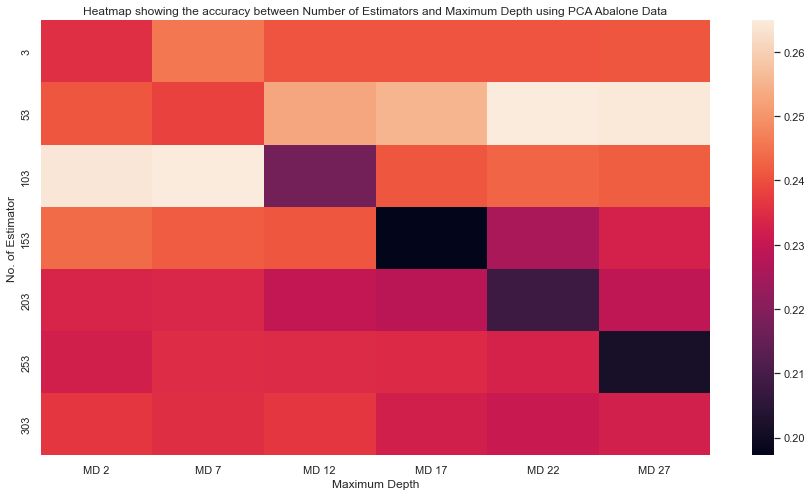

In [173]:
# initialize the heat map using the heatmap array dataset
sns.heatmap(abalone_pca_heatmap_array)

plt.xlabel("Maximum Depth")

plt.title("Heatmap showing the accuracy between Number of Estimators and Maximum Depth using PCA Abalone Data")

###### 4.2.1.3 LDA Dataset

We will generate the heatmap using the mean test score which was generated by GridSearchCV using the training data as shown below

In [174]:
abalone_lda_rforest_meanscore = abalone_lda_rforest_cv.cv_results_["mean_test_score"]

the total number of elements in the array is 

In [175]:
len(abalone_lda_rforest_meanscore)

42

The mean test score of the random forest is arranged with respect to depth first. For our scenerio, 6 maximum depths were used and 7 number of estimators were tried. The total mean test scores produced are 42. We will reshape the array in 7 by 6 to generate the heatmap as shown below: 

In [176]:
# save the array using a pandas DataFrame and provide the column names
abalone_lda_heatmap_array = pd.DataFrame(abalone_lda_rforest_meanscore.reshape(7,6), columns = ["MD 2","MD 7","MD 12","MD 17","MD 22","MD 27"])

# add the index column which is the Number of Estimators
abalone_lda_heatmap_array["No. of Estimator"]= [3, 53, 103, 153, 203, 253, 303]

# set the Number of Estimators as the index column
abalone_lda_heatmap_array.set_index("No. of Estimator", inplace=True)

Now we will preview the data as shown below:

In [177]:
abalone_lda_heatmap_array

,MD 2,MD 7,MD 12,MD 17,MD 22,MD 27
No. of Estimator,,,,,,
3,0.245140,0.255020,0.252326,0.252026,0.252326,0.251727
53,0.252924,0.247536,0.258901,0.258907,0.261301,0.264294
103,0.263094,0.261900,0.211017,0.246927,0.242445,0.243942
153,0.240949,0.244239,0.245438,0.215207,0.235855,0.236755
203,0.234958,0.236154,0.238549,0.238848,0.208916,0.239743
253,0.237656,0.238252,0.233163,0.231067,0.233460,0.208618
303,0.236753,0.236157,0.240049,0.238251,0.234658,0.237055


Now we will generate the heatmap using seaborn as shown below:

Text(0.5, 1.0, 'Heatmap showing the accuracy between Number of Estimators and Maximum Depth using LDA Abalone Data')

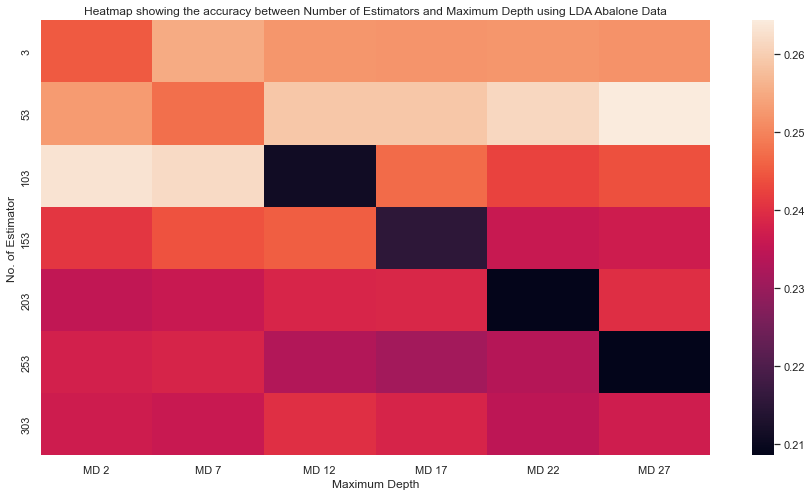

In [178]:
# initialize the heat map using the heatmap array dataset
sns.heatmap(abalone_lda_heatmap_array)

plt.xlabel("Maximum Depth")

plt.title("Heatmap showing the accuracy between Number of Estimators and Maximum Depth using LDA Abalone Data")

##### 4.2.2 Wine Dataset

###### 4.2.2.1 Raw Dataset

We will generate the heatmap using the mean test score which was generated by GridSearchCV using the training data as shown below

In [179]:
wine_raw_rforest_cv.cv_results_

{'mean_fit_time': array([0.0269968 , 0.36440148, 0.53979983, 0.8727993 , 1.04219689,
        1.2815969 , 1.95507488, 0.02679663, 0.63739748, 0.9133996 ,
        1.3613946 , 1.74179649, 2.3437993 , 5.21472845, 0.08600268,
        1.20556479, 1.70350971, 2.93145046, 3.75150547, 3.16403623,
        4.09785953, 0.04059701, 0.73152261, 1.42319961, 2.0618145 ,
        3.2621139 , 3.7813024 , 4.25960264, 0.0445962 , 0.70379715,
        1.37039862, 2.08679957, 2.81000051, 3.63203974, 4.2397994 ,
        0.05259709, 0.73739629, 1.42519302, 2.14519687, 2.79499717,
        3.57080026, 4.20831242]),
 'std_fit_time': array([7.01610879e-03, 3.54831113e-02, 6.09958496e-02, 2.02213524e-01,
        9.31178110e-02, 5.26354305e-02, 4.07759278e-01, 4.00982156e-04,
        1.56175185e-01, 2.23330995e-02, 4.71362233e-02, 6.27556047e-02,
        1.17624808e-01, 1.01416218e+00, 3.82661696e-02, 3.50318898e-01,
        4.28410846e-01, 7.28126852e-01, 6.99654145e-01, 2.19343482e-01,
        5.82148727e-01, 4.909

In [180]:
wine_raw_rforest_meanscore = wine_raw_rforest_cv.cv_results_["mean_test_score"]

the total number of elements in the array is 

In [181]:
len(wine_raw_rforest_meanscore)

42

The mean test score of the random forest is arranged with respect to depth first. For our scenerio, 6 maximum depths were used and 7 number of estimators were tried. The total mean test scores produced are 42. We will reshape the array in 7 by 6 to generate the heatmap as shown below: 

In [182]:
# save the array using a pandas DataFrame and provide the column names
wine_raw_heatmap_array = pd.DataFrame(wine_raw_rforest_meanscore.reshape(7,6), columns = ["MD 2","MD 7","MD 12","MD 17","MD 22","MD 27"])

# add the index column which is the Number of Estimators
wine_raw_heatmap_array["No. of Estimator"]= [3, 53, 103, 153, 203, 253, 303]

# set the Number of Estimators as the index column
wine_raw_heatmap_array.set_index("No. of Estimator", inplace=True)

Now we will preview the data as shown below:

In [183]:
wine_raw_heatmap_array

,MD 2,MD 7,MD 12,MD 17,MD 22,MD 27
No. of Estimator,,,,,,
3,0.493165,0.531457,0.530302,0.530111,0.531651,0.532614
53,0.532421,0.556472,0.581866,0.584177,0.584177,0.585523
103,0.584562,0.583600,0.566286,0.650758,0.656914,0.655182
153,0.655952,0.656144,0.657299,0.561667,0.663840,0.668652
203,0.670382,0.668457,0.670767,0.669614,0.568018,0.655951
253,0.666341,0.665380,0.671347,0.672693,0.671538,0.561860
303,0.660763,0.668843,0.664418,0.669229,0.671346,0.672693


Now we will generate the heatmap using seaborn as shown below:

Text(0.5, 1.0, 'Heatmap showing the accuracy between Number of Estimators & Maximum Depth using Raw Wine Data')

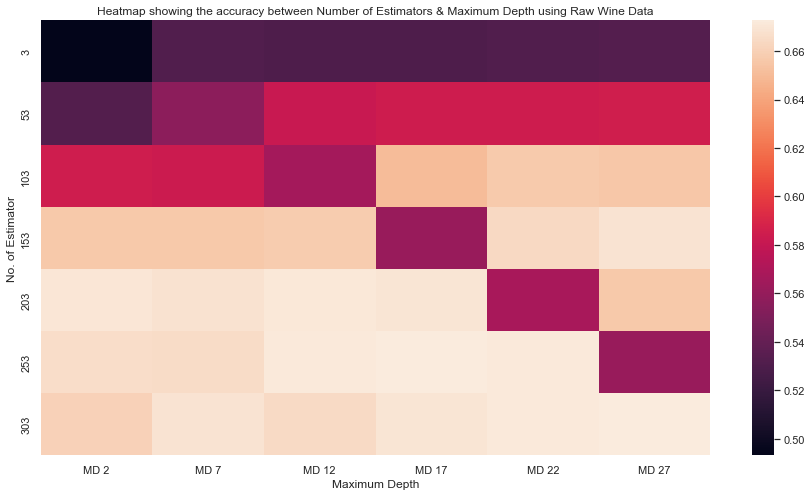

In [184]:
# initialize the heat map using the heatmap array dataset
sns.heatmap(wine_raw_heatmap_array)

plt.xlabel("Maximum Depth")

plt.title("Heatmap showing the accuracy between Number of Estimators & Maximum Depth using Raw Wine Data")

###### 4.2.2.2 PCA Dataset

We will generate the heatmap using the mean test score which was generated by GridSearchCV using the training data as shown below

In [185]:
wine_pca_rforest_cv.cv_results_

{'mean_fit_time': array([0.0293386 , 0.33899903, 0.85815787, 1.19396515, 2.07988586,
        1.70418487, 1.447997  , 0.03099771, 0.49419742, 0.96979809,
        1.3900013 , 1.83339744, 2.35402308, 2.79080224, 0.04039707,
        0.6595973 , 1.2640007 , 1.9623807 , 2.53460021, 3.45101647,
        4.30859838, 0.05139632, 0.78760109, 1.64979658, 2.24699645,
        3.01580181, 4.26739635, 5.48439426, 0.05020041, 0.83520155,
        1.65920296, 2.45740004, 3.15911326, 5.12519898, 5.74455075,
        0.05400057, 1.06720161, 1.55759401, 2.81300211, 3.09140277,
        3.83979974, 4.44140396]),
 'std_fit_time': array([3.87339488e-03, 5.34231810e-02, 9.79205041e-02, 3.97553895e-01,
        4.64708905e-01, 1.19673936e-01, 1.84714053e-02, 4.29524156e-06,
        2.42455311e-02, 6.39912929e-02, 1.57876900e-02, 4.55686186e-02,
        7.37385935e-02, 7.36562393e-02, 4.90353182e-04, 8.38240824e-03,
        1.53746094e-02, 7.78739030e-02, 4.15233229e-02, 5.37343117e-01,
        3.68112641e-01, 1.049

In [186]:
wine_pca_rforest_meanscore = wine_pca_rforest_cv.cv_results_["mean_test_score"]

the total number of elements in the array is 

In [187]:
len(wine_pca_rforest_meanscore)

42

The mean test score of the random forest is arranged with respect to depth first. For our scenerio, 6 maximum depths were used and 7 number of estimators were tried. The total mean test scores produced are 42. We will reshape the array in 7 by 6 to generate the heatmap as shown below: 

In [188]:
# save the array using a pandas DataFrame and provide the column names
wine_pca_heatmap_array = pd.DataFrame(wine_pca_rforest_meanscore.reshape(7,6), columns = ["MD 2","MD 7","MD 12","MD 17","MD 22","MD 27"])

# add the index column which is the Number of Estimators
wine_pca_heatmap_array["No. of Estimator"]= [3, 53, 103, 153, 203, 253, 303]

# set the Number of Estimators as the index column
wine_pca_heatmap_array.set_index("No. of Estimator", inplace=True)

Now we will preview the data as shown below:

In [189]:
wine_pca_heatmap_array

,MD 2,MD 7,MD 12,MD 17,MD 22,MD 27
No. of Estimator,,,,,,
3,0.484320,0.508178,0.503753,0.502020,0.502983,0.502405
53,0.502020,0.535117,0.575331,0.581679,0.581872,0.582065
103,0.579948,0.581487,0.557246,0.629398,0.636131,0.639979
153,0.639597,0.641328,0.641329,0.552241,0.642290,0.649216
203,0.653641,0.651332,0.654027,0.651526,0.543196,0.648254
253,0.650757,0.652296,0.650564,0.650179,0.653066,0.551663
303,0.647099,0.646523,0.650564,0.653258,0.651141,0.649409


Now we will generate the heatmap using seaborn as shown below:

Text(0.5, 1.0, 'Heatmap showing the accuracy between Number of Estimators & Maximum Depth using PCA Wine Data')

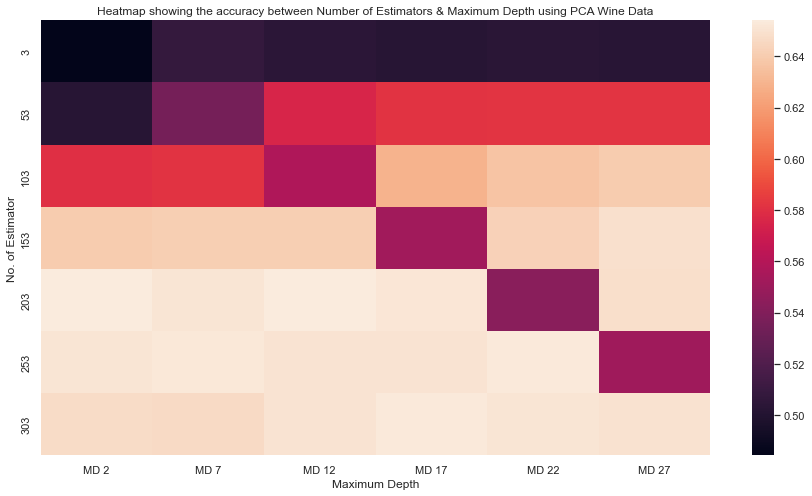

In [190]:
# initialize the heat map using the heatmap array dataset
sns.heatmap(wine_pca_heatmap_array)

plt.xlabel("Maximum Depth")

plt.title("Heatmap showing the accuracy between Number of Estimators & Maximum Depth using PCA Wine Data")

###### 4.2.2.3 LDA Dataset

We will generate the heatmap using the mean test score which was generated by GridSearchCV using the training data as shown below

In [191]:
wine_lda_rforest_cv.cv_results_

{'mean_fit_time': array([0.03079834, 0.23559966, 0.55119777, 0.6977983 , 0.8651978 ,
        1.12619972, 1.28719468, 0.02359829, 0.33839946, 0.67139678,
        1.1885983 , 1.60179653, 2.56990414, 2.1139998 , 0.0335988 ,
        0.44520082, 0.86780028, 1.3507967 , 1.84000306, 2.13780241,
        2.61779895, 0.0333971 , 0.56859941, 1.07020245, 1.55939856,
        2.02959924, 2.58819723, 3.13519559, 0.05260262, 0.73100076,
        1.23540158, 1.92443185, 2.5263772 , 4.1754921 , 3.84675875,
        0.03819814, 0.66760149, 1.36620069, 1.71219964, 2.44239836,
        3.23840113, 3.87420149]),
 'std_fit_time': array([2.71158272e-03, 1.75881153e-02, 9.83863465e-02, 6.60308888e-02,
        5.83329588e-02, 1.11598580e-01, 9.19455819e-02, 1.02110074e-03,
        2.57676450e-03, 3.43729160e-02, 3.71334792e-01, 2.38280220e-01,
        5.39820607e-01, 2.47839432e-01, 7.91259904e-03, 9.49420497e-03,
        7.73060271e-03, 1.12023795e-01, 3.43102350e-01, 6.66578321e-02,
        5.91271942e-02, 1.021

In [192]:
wine_lda_rforest_meanscore = wine_lda_rforest_cv.cv_results_["mean_test_score"]

the total number of elements in the array is 

In [193]:
len(wine_lda_rforest_meanscore)

42

The mean test score of the random forest is arranged with respect to depth first. For our scenerio, 6 maximum depths were used and 7 number of estimators were tried. The total mean test scores produced are 42. We will reshape the array in 7 by 6 to generate the heatmap as shown below: 

In [194]:
# save the array using a pandas DataFrame and provide the column names
wine_lda_heatmap_array = pd.DataFrame(wine_lda_rforest_meanscore.reshape(7,6), columns = ["MD 2","MD 7","MD 12","MD 17","MD 22","MD 27"])

# add the index column which is the Number of Estimators
wine_lda_heatmap_array["No. of Estimator"]= [3, 53, 103, 153, 203, 253, 303]

# set the Number of Estimators as the index column
wine_lda_heatmap_array.set_index("No. of Estimator", inplace=True)

Now we will preview the data as shown below:

In [195]:
wine_lda_heatmap_array

,MD 2,MD 7,MD 12,MD 17,MD 22,MD 27
No. of Estimator,,,,,,
3,0.467576,0.536848,0.536271,0.536271,0.536848,0.536271
53,0.536463,0.543966,0.567827,0.567827,0.568405,0.567443
103,0.568596,0.567826,0.544163,0.598614,0.598807,0.599768
153,0.600153,0.600153,0.602463,0.558015,0.628246,0.627668
203,0.629207,0.632672,0.633057,0.634595,0.537812,0.623821
253,0.629207,0.631324,0.627092,0.626323,0.626130,0.543197
303,0.622668,0.623052,0.627479,0.623245,0.623630,0.621127


Now we will generate the heatmap using seaborn as shown below:

Text(0.5, 1.0, 'Heatmap showing the accuracy between Number of Estimators & Maximum Depth using LDA Wine Data')

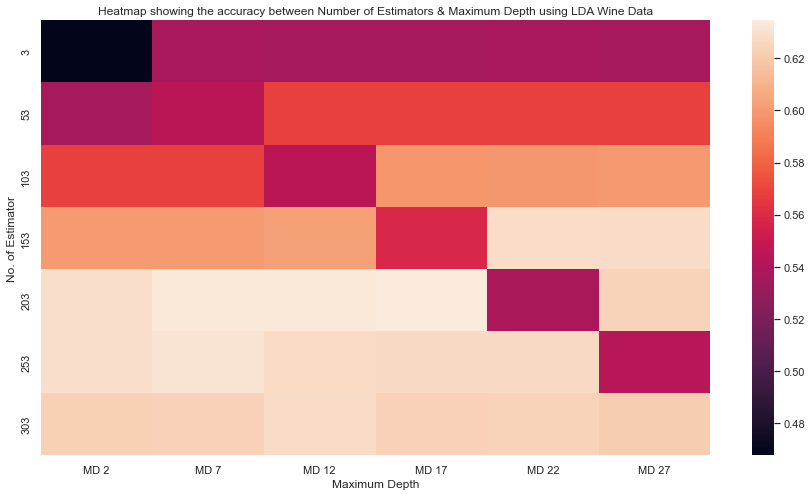

In [196]:
# initialize the heat map using the heatmap array dataset
sns.heatmap(wine_lda_heatmap_array)

plt.xlabel("Maximum Depth")

plt.title("Heatmap showing the accuracy between Number of Estimators & Maximum Depth using LDA Wine Data")

## Question 5: Gradient Tree Boosting

#### 5.1 Gradient Tree using Cross Validation

##### 5.1.1 Abalone Dataset 

###### 5.1.1.1 Raw Data 

For the gradient tree boosting algorithm, we will only be varying the number of estimators only and try to ascertain which is the best hyperparameter that yields the best accuracy. We start by initializing the GridSearchCV function as shown below:

In [197]:
# create an array for the number of estimators for the classifier parameters
abalone_gtboost_no_estimators = list(range(3,204,50))

# generate a dictionary for the parameters of random forest classifier
parameters = {"n_estimators": abalone_gtboost_no_estimators}

# initialize the GridSearchCV function
abalone_raw_gtboosting_cv = GridSearchCV(GradientBoostingClassifier(random_state=27), parameters, cv = 5)

# fit the training data using the GridSearchCV function
abalone_raw_gtboosting_cv.fit(abalone_raw_train, abalone_rings_raw_train)

# display the results of the tuning of the hyperparameters
abalone_raw_gtboosting_cv.cv_results_

C:\Users\ibteh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'mean_fit_time': array([ 0.90939808, 13.73690434, 27.56994538, 41.66027298, 51.00899935]),
 'std_fit_time': array([0.22213655, 1.15131814, 2.4545933 , 6.38507814, 4.45273781]),
 'mean_score_time': array([0.00900154, 0.02519946, 0.05039997, 0.0617959 , 0.0734014 ]),
 'std_score_time': array([0.00178937, 0.00075056, 0.01357713, 0.00808334, 0.00873236]),
 'param_n_estimators': masked_array(data=[3, 53, 103, 153, 203],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 3},
  {'n_estimators': 53},
  {'n_estimators': 103},
  {'n_estimators': 153},
  {'n_estimators': 203}],
 'split0_test_score': array([0.2406577 , 0.24364723, 0.23467862, 0.22869955, 0.23617339]),
 'split1_test_score': array([0.25598802, 0.23353293, 0.24850299, 0.23952096, 0.23952096]),
 'split2_test_score': array([0.25      , 0.23353293, 0.24251497, 0.2260479 , 0.22155689]),
 'split3_test_score': array([0.25299401, 0.26497006, 0.24251497, 0

The best hyperparameters for the gradient boost tree are:

In [198]:
abalone_raw_gtboosting_cv.best_params_

{'n_estimators': 3}

The score achieved by the best hyperparameters is:

In [199]:
abalone_raw_gtboosting_cv.best_score_

0.24873034200656985

Now we will initialize a new gradient tree and train it with the best hyperparameters that were discovered by GridSearchCV

In [200]:
# initialize the decision tree classifier with the best hyperparemeter
abalone_raw_gtboosting = GradientBoostingClassifier(random_state=27, n_estimators= 3)

# train the classifier using the training dataset
abalone_raw_gtboosting.fit(abalone_raw_train, abalone_rings_raw_train)

# view the accuracy of the classifier using the testing dataset
abalone_raw_gtboosting_test_accuracy = abalone_raw_gtboosting.score(abalone_raw_test, abalone_rings_raw_test)
abalone_raw_gtboosting_test_accuracy

0.2535885167464115

###### 5.1.1.2 PCA Data 

In [201]:
# create an array for the number of estimators for the classifier parameters
abalone_gtboost_no_estimators = list(range(3,204,50))

# generate a dictionary for the parameters of random forest classifier
parameters = {"n_estimators": abalone_gtboost_no_estimators}

# initialize the GridSearchCV function
abalone_pca_gtboosting_cv = GridSearchCV(GradientBoostingClassifier(random_state=27), parameters, cv = 5)

# fit the training data using the GridSearchCV function
abalone_pca_gtboosting_cv.fit(abalone_PCAminmax_train , abalone_rings_PCAminmax_train)

# display the results of the tuning of the hyperprameters
abalone_pca_gtboosting_cv.cv_results_

C:\Users\ibteh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'mean_fit_time': array([ 0.72759986, 12.46819978, 27.77779679, 37.76960011, 44.38211308]),
 'std_fit_time': array([0.05698927, 0.34519657, 3.17447328, 1.81388216, 2.79316763]),
 'mean_score_time': array([0.00859857, 0.02679834, 0.04320207, 0.06379757, 0.08599825]),
 'std_score_time': array([0.0018539 , 0.00204422, 0.00171553, 0.00624448, 0.0387219 ]),
 'param_n_estimators': masked_array(data=[3, 53, 103, 153, 203],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 3},
  {'n_estimators': 53},
  {'n_estimators': 103},
  {'n_estimators': 153},
  {'n_estimators': 203}],
 'split0_test_score': array([0.22122571, 0.24364723, 0.24962631, 0.24663677, 0.23467862]),
 'split1_test_score': array([0.23353293, 0.24550898, 0.2245509 , 0.2260479 , 0.21706587]),
 'split2_test_score': array([0.26197605, 0.23203593, 0.21856287, 0.23502994, 0.23353293]),
 'split3_test_score': array([0.24700599, 0.24401198, 0.24101796, 0

The best hyperparameters for the gradient boost tree are:

In [202]:
abalone_pca_gtboosting_cv.best_params_

{'n_estimators': 53}

The score achieved by the best hyperparameters is:

In [203]:
abalone_pca_gtboosting_cv.best_score_

0.2448372313668627

Now we will initialize a new gradient tree and train it with the best hyperparameters that were discovered by GridSearchCV

In [204]:
# initialize the decision tree classifier with the best hyperparemeter
abalone_pca_gtboosting = GradientBoostingClassifier(random_state=27, n_estimators= 53)

# train the classifier using the training dataset
abalone_pca_gtboosting.fit(abalone_PCAminmax_train , abalone_rings_PCAminmax_train)

# view the accuracy of the classifier using the testing dataset
abalone_pca_gtboosting_test_accuracy = abalone_pca_gtboosting.score(abalone_PCAminmax_test , abalone_rings_PCAminmax_test)
abalone_pca_gtboosting_test_accuracy

0.23923444976076555

###### 5.1.1.3 LDA Data 

In [205]:
# create an array for the number of estimators for the classifier parameters
abalone_gtboost_no_estimators = list(range(3,204,50))

# generate a dictionary for the parameters of random forest classifier
parameters = {"n_estimators": abalone_gtboost_no_estimators}

# initialize the GridSearchCV function
abalone_lda_gtboosting_cv = GridSearchCV(GradientBoostingClassifier(random_state=27), parameters, cv = 5)

# fit the training data using the GridSearchCV function
abalone_lda_gtboosting_cv.fit(abalone_LDAminmax_train , abalone_rings_LDAminmax_train)

# display the results of the tuning of the hyperprameters
abalone_lda_gtboosting_cv.cv_results_

C:\Users\ibteh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'mean_fit_time': array([ 0.72340341, 12.76328931, 27.44009423, 37.41540041, 48.25794959]),
 'std_fit_time': array([0.06366081, 0.61075682, 2.99484953, 2.36584238, 3.82889513]),
 'mean_score_time': array([0.00839829, 0.02419519, 0.04160371, 0.05639615, 0.06599679]),
 'std_score_time': array([0.00185254, 0.00116341, 0.00135428, 0.00531159, 0.00532947]),
 'param_n_estimators': masked_array(data=[3, 53, 103, 153, 203],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 3},
  {'n_estimators': 53},
  {'n_estimators': 103},
  {'n_estimators': 153},
  {'n_estimators': 203}],
 'split0_test_score': array([0.22720478, 0.24364723, 0.24962631, 0.25261584, 0.2406577 ]),
 'split1_test_score': array([0.23802395, 0.24850299, 0.2260479 , 0.23203593, 0.23353293]),
 'split2_test_score': array([0.24251497, 0.25      , 0.24101796, 0.22904192, 0.21107784]),
 'split3_test_score': array([0.20508982, 0.24251497, 0.24101796, 0

The best hyperparameters for the gradient boost tree are:

In [206]:
abalone_lda_gtboosting_cv.best_params_

{'n_estimators': 53}

The score achieved by the best hyperparameters is:

In [207]:
abalone_lda_gtboosting_cv.best_score_

0.24573543495967706

Now we will initialize a new gradient tree and train it with the best hyperparameters that were discovered by GridSearchCV

In [208]:
# initialize the decision tree classifier with the best hyperparemeter
abalone_lda_gtboosting = GradientBoostingClassifier(random_state=27, n_estimators= 53)

# train the classifier using the training dataset
abalone_lda_gtboosting.fit(abalone_LDAminmax_train , abalone_rings_LDAminmax_train)

# view the accuracy of the classifier using the testing dataset
abalone_lda_gtboosting_test_accuracy = abalone_lda_gtboosting.score(abalone_LDAminmax_test , abalone_rings_LDAminmax_test)
abalone_lda_gtboosting_test_accuracy

0.03708133971291866

##### 5.1.2 Wine Dataset 

###### 5.1.2.1 Raw Data 

In [209]:
# create an array for the number of estimators for the classifier parameters
wine_gtboost_no_estimators = list(range(3,204,50))

# generate a dictionary for the parameters of random forest classifier
parameters = {"n_estimators": wine_gtboost_no_estimators}

# initialize the GridSearchCV function
wine_raw_gtboosting_cv = GridSearchCV(GradientBoostingClassifier(random_state=27), parameters, cv = 5)

# fit the training data using the GridSearchCV function
wine_raw_gtboosting_cv.fit(wine_raw_train, wine_quality_raw_train)

# display the results of the tuning of the hyperprameters
wine_raw_gtboosting_cv.cv_results_

C:\Users\ibteh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'mean_fit_time': array([ 0.26699967,  4.67379928,  9.05959897, 18.33676858, 18.09918437]),
 'std_fit_time': array([3.89882926e-03, 8.36532404e-02, 1.47475649e-01, 4.14813475e+00,
        9.32012904e-01]),
 'mean_score_time': array([0.00459986, 0.01260052, 0.01860251, 0.0360003 , 0.03239989]),
 'std_score_time': array([0.00048876, 0.00049017, 0.00048905, 0.01269624, 0.00102194]),
 'param_n_estimators': masked_array(data=[3, 53, 103, 153, 203],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 3},
  {'n_estimators': 53},
  {'n_estimators': 103},
  {'n_estimators': 153},
  {'n_estimators': 203}],
 'split0_test_score': array([0.53653846, 0.5875    , 0.58846154, 0.59903846, 0.60961538]),
 'split1_test_score': array([0.52403846, 0.58076923, 0.59326923, 0.59711538, 0.60384615]),
 'split2_test_score': array([0.51491819, 0.57844081, 0.59287777, 0.61116458, 0.61790183]),
 'split3_test_score': array([0.5216554

The best hyperparameters for the gradient boost tree are:

In [210]:
wine_raw_gtboosting_cv.best_params_

{'n_estimators': 203}

The score achieved by the best hyperparameters is:

In [211]:
wine_raw_gtboosting_cv.best_score_

0.5984189679425482

Now we will initialize a new gradient tree and train it with the best hyperparameters that were discovered by GridSearchCV

In [212]:
# initialize the decision tree classifier with the best hyperparemeter
wine_raw_gtboosting = GradientBoostingClassifier(random_state=27, n_estimators= 203)

# train the classifier using the training dataset
wine_raw_gtboosting.fit(wine_raw_train, wine_quality_raw_train)

# view the accuracy of the classifier using the testing dataset
wine_raw_gtboosting_test_accuracy = wine_raw_gtboosting.score(wine_raw_test, wine_quality_raw_test)
wine_raw_gtboosting_test_accuracy

0.6076923076923076

###### 5.1.1.2 PCA Data 

In [213]:
# create an array for the number of estimators for the classifier parameters
wine_gtboost_no_estimators = list(range(3,204,50))

# generate a dictionary for the parameters of random forest classifier
parameters = {"n_estimators": wine_gtboost_no_estimators}

# initialize the GridSearchCV function
wine_pca_gtboosting_cv = GridSearchCV(GradientBoostingClassifier(random_state=27), parameters, cv = 5)

# fit the training data using the GridSearchCV function
wine_pca_gtboosting_cv.fit(wine_PCAminmax_train , wine_quality_PCAminmax_train)

# display the results of the tuning of the hyperprameters
wine_pca_gtboosting_cv.cv_results_

C:\Users\ibteh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'mean_fit_time': array([ 0.33059883,  6.25639644, 16.01319847, 16.93199792, 23.06800275]),
 'std_fit_time': array([0.00392735, 0.86480327, 2.73605996, 0.55077099, 0.98214995]),
 'mean_score_time': array([0.00480127, 0.01400294, 0.02740345, 0.02380185, 0.02960081]),
 'std_score_time': array([0.00040078, 0.00502122, 0.00715275, 0.00040273, 0.00080047]),
 'param_n_estimators': masked_array(data=[3, 53, 103, 153, 203],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 3},
  {'n_estimators': 53},
  {'n_estimators': 103},
  {'n_estimators': 153},
  {'n_estimators': 203}],
 'split0_test_score': array([0.50096154, 0.56057692, 0.56442308, 0.57692308, 0.58076923]),
 'split1_test_score': array([0.47692308, 0.58557692, 0.59326923, 0.59807692, 0.60576923]),
 'split2_test_score': array([0.48893167, 0.56111646, 0.59287777, 0.60635226, 0.6053898 ]),
 'split3_test_score': array([0.49278152, 0.54379211, 0.55822907, 0

The best hyperparameters for the gradient boost tree are:

In [214]:
wine_pca_gtboosting_cv.best_params_

{'n_estimators': 203}

The score achieved by the best hyperparameters is:

In [215]:
wine_pca_gtboosting_cv.best_score_

0.5864895979862295

Now we will initialize a new gradient tree and train it with the best hyperparameters that were discovered by GridSearchCV

In [216]:
# initialize the decision tree classifier with the best hyperparemeter
wine_pca_gtboosting = GradientBoostingClassifier(random_state=27, n_estimators= 203)

# train the classifier using the training dataset
wine_pca_gtboosting.fit(wine_PCAminmax_train , wine_quality_PCAminmax_train)

# view the accuracy of the classifier using the testing dataset
wine_pca_gtboosting_test_accuracy = wine_pca_gtboosting.score(wine_PCAminmax_test , wine_quality_PCAminmax_test)
wine_pca_gtboosting_test_accuracy

0.4330769230769231

###### 5.1.1.3 LDA Data 

In [217]:
# create an array for the number of estimators for the classifier parameters
wine_gtboost_no_estimators = list(range(3,204,50))

# generate a dictionary for the parameters of random forest classifier
parameters = {"n_estimators": wine_gtboost_no_estimators}

# initialize the GridSearchCV function
wine_lda_gtboosting_cv = GridSearchCV(GradientBoostingClassifier(random_state=27), parameters, cv = 5)

# fit the training data using the GridSearchCV function
wine_lda_gtboosting_cv.fit(wine_LDAminmax_train , wine_quality_LDAminmax_train)

# display the results of the tuning of the hyperprameters
wine_lda_gtboosting_cv.cv_results_

C:\Users\ibteh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


{'mean_fit_time': array([ 0.2161974 ,  3.61499987,  9.46694598, 11.7002337 , 15.74487972]),
 'std_fit_time': array([0.02179355, 0.14403067, 1.8320693 , 1.10282268, 1.38919657]),
 'mean_score_time': array([0.00500169, 0.01100082, 0.02271791, 0.02440009, 0.03719668]),
 'std_score_time': array([6.33544062e-04, 7.29420592e-07, 6.51653992e-03, 1.74637205e-03,
        9.92647047e-03]),
 'param_n_estimators': masked_array(data=[3, 53, 103, 153, 203],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 3},
  {'n_estimators': 53},
  {'n_estimators': 103},
  {'n_estimators': 153},
  {'n_estimators': 203}],
 'split0_test_score': array([0.52596154, 0.54423077, 0.54903846, 0.56538462, 0.57788462]),
 'split1_test_score': array([0.52307692, 0.55865385, 0.56730769, 0.56153846, 0.56442308]),
 'split2_test_score': array([0.5120308 , 0.54956689, 0.55919153, 0.56496631, 0.57651588]),
 'split3_test_score': array([0.5197305

The best hyperparameters for the gradient boost tree are:

In [218]:
wine_lda_gtboosting_cv.best_params_

{'n_estimators': 203}

The score achieved by the best hyperparameters is:

In [219]:
wine_lda_gtboosting_cv.best_score_

0.5737935885096617

Now we will initialize a new gradient tree and train it with the best hyperparameters that were discovered by GridSearchCV

In [220]:
# initialize the decision tree classifier with the best hyperparemeter
wine_lda_gtboosting = GradientBoostingClassifier(random_state=27, n_estimators= 203)

# train the classifier using the training dataset
wine_lda_gtboosting.fit(wine_LDAminmax_train , wine_quality_LDAminmax_train)

# view the accuracy of the classifier using the testing dataset
wine_lda_gtboosting_test_accuracy = wine_lda_gtboosting.score(wine_LDAminmax_test , wine_quality_LDAminmax_test)
wine_lda_gtboosting_test_accuracy

0.4023076923076923

#### 5.2 Plot of Mean Accuracy 

##### 5.2.1 Abalone Dataset

__Raw Dataset__

In [221]:
# generate a dataframe of the maximum depth and the respective score
abalone_raw_gtboosting_cv_results = pd.DataFrame([[3, 53, 103, 153, 203],abalone_raw_gtboosting_cv.cv_results_['mean_test_score']])

# transpose the dataframe
abalone_raw_gtboosting_cv_results = abalone_raw_gtboosting_cv_results.T

# name the columns of the dataframe
abalone_raw_gtboosting_cv_results.columns = ["Number of Estimators","Mean Accuracy"]

Text(0.5, 1.0, 'Accuracy of Number of Estimators using Gradient Tree Boosting on Raw Abalone Dataset')

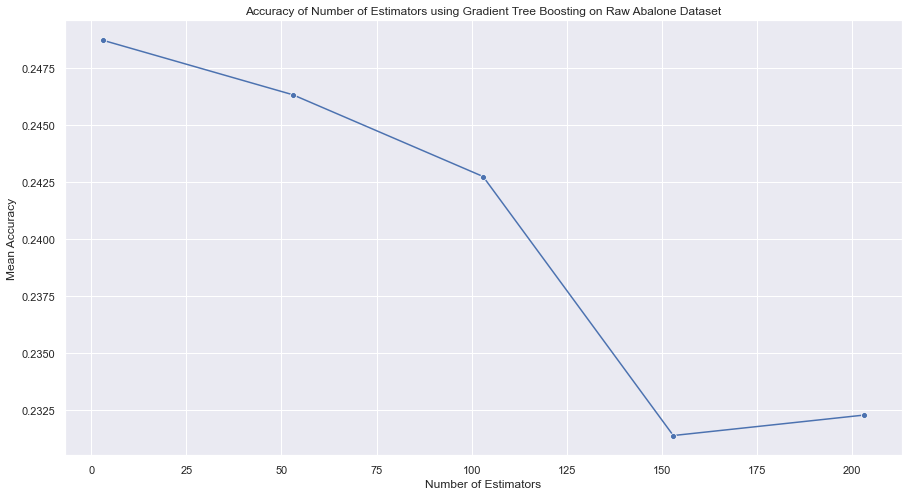

In [222]:
# initialize the plot
sns.set(rc = {'figure.figsize':(15,8)})

# assign the datapoints for the axes
sns.lineplot(data= abalone_raw_gtboosting_cv_results, x="Number of Estimators", y="Mean Accuracy",marker="o")

# assign the graph title
plt.title("Accuracy of Number of Estimators using Gradient Tree Boosting on Raw Abalone Dataset")

__PCA Dataset__

In [223]:
# generate a dataframe of the maximum depth and the respective score
abalone_pca_gtboosting_cv_results = pd.DataFrame([[3, 53, 103, 153, 203],abalone_pca_gtboosting_cv.cv_results_['mean_test_score']])

# transpose the dataframe
abalone_pca_gtboosting_cv_results = abalone_pca_gtboosting_cv_results.T

# name the columns of the dataframe
abalone_pca_gtboosting_cv_results.columns = ["Number of Estimators","Mean Accuracy"]

Text(0.5, 1.0, 'Accuracy of Number of Estimators using Gradient Tree Boosting on PCA Abalone Dataset')

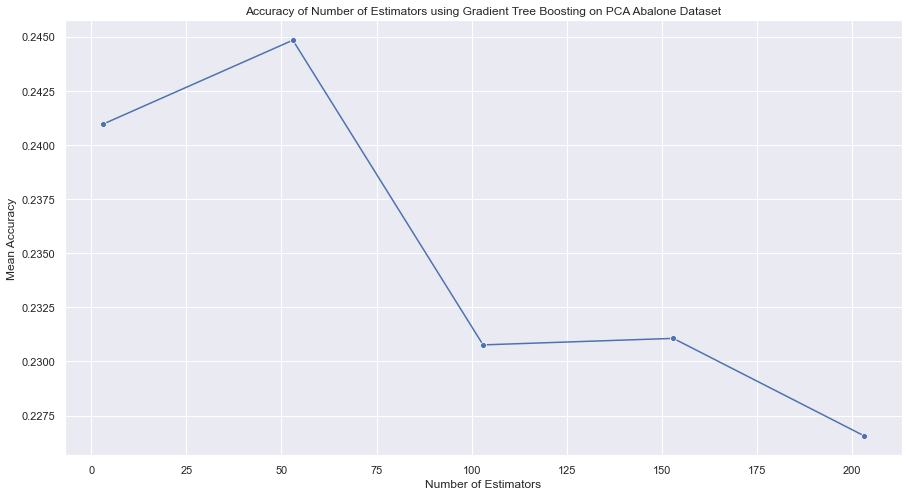

In [224]:
# initialize the plot
sns.set(rc = {'figure.figsize':(15,8)})

# assign the datapoints for the axes
sns.lineplot(data= abalone_pca_gtboosting_cv_results, x="Number of Estimators", y="Mean Accuracy",marker="o")

# assign the graph title
plt.title("Accuracy of Number of Estimators using Gradient Tree Boosting on PCA Abalone Dataset")

__LDA Dataset__

In [225]:
# generate a dataframe of the maximum depth and the respective score
abalone_lda_gtboosting_cv_results = pd.DataFrame([[3, 53, 103, 153, 203],abalone_lda_gtboosting_cv.cv_results_['mean_test_score']])

# transpose the dataframe
abalone_lda_gtboosting_cv_results = abalone_lda_gtboosting_cv_results.T

# name the columns of the dataframe
abalone_lda_gtboosting_cv_results.columns = ["Number of Estimators","Mean Accuracy"]

Text(0.5, 1.0, 'Accuracy of Number of Estimators using Gradient Tree Boosting on LDA Abalone Dataset')

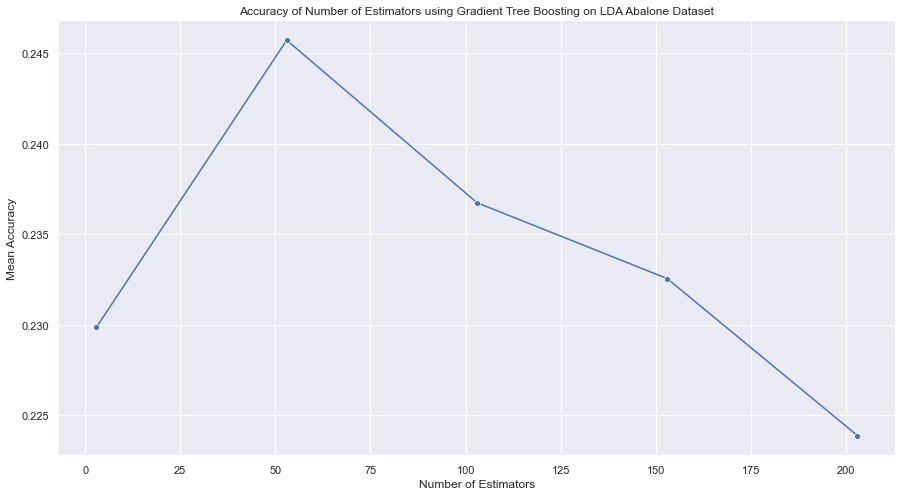

In [226]:
# initialize the plot
sns.set(rc = {'figure.figsize':(15,8)})

# assign the datapoints for the axes
sns.lineplot(data= abalone_lda_gtboosting_cv_results, x="Number of Estimators", y="Mean Accuracy",marker="o")

# assign the graph title
plt.title("Accuracy of Number of Estimators using Gradient Tree Boosting on LDA Abalone Dataset")

##### 5.2.2 Wine Dataset

__Raw Dataset__

In [227]:
# generate a dataframe of the maximum depth and the respective score
wine_raw_gtboosting_cv_results = pd.DataFrame([[3, 53, 103, 153, 203],wine_raw_gtboosting_cv.cv_results_['mean_test_score']])

# transpose the dataframe
wine_raw_gtboosting_cv_results = wine_raw_gtboosting_cv_results.T

# name the columns of the dataframe
wine_raw_gtboosting_cv_results.columns = ["Number of Estimators","Mean Accuracy"]

Text(0.5, 1.0, 'Accuracy of Number of Estimators using Gradient Tree Boosting on Raw Wine Dataset')

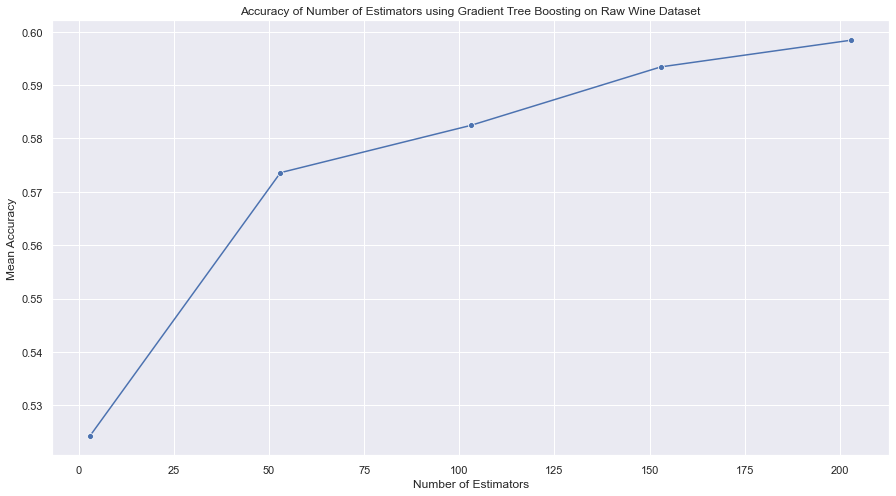

In [228]:
# initialize the plot
sns.set(rc = {'figure.figsize':(15,8)})

# assign the datapoints for the axes
sns.lineplot(data= wine_raw_gtboosting_cv_results, x="Number of Estimators", y="Mean Accuracy",marker="o")

# assign the graph title
plt.title("Accuracy of Number of Estimators using Gradient Tree Boosting on Raw Wine Dataset")

__PCA Dataset__

In [229]:
# generate a dataframe of the maximum depth and the respective score
wine_pca_gtboosting_cv_results = pd.DataFrame([[3, 53, 103, 153, 203],wine_pca_gtboosting_cv.cv_results_['mean_test_score']])

# transpose the dataframe
wine_pca_gtboosting_cv_results = wine_pca_gtboosting_cv_results.T

# name the columns of the dataframe
wine_pca_gtboosting_cv_results.columns = ["Number of Estimators","Mean Accuracy"]

Text(0.5, 1.0, 'Accuracy of Number of Estimators using Gradient Tree Boosting on PCA Wine Dataset')

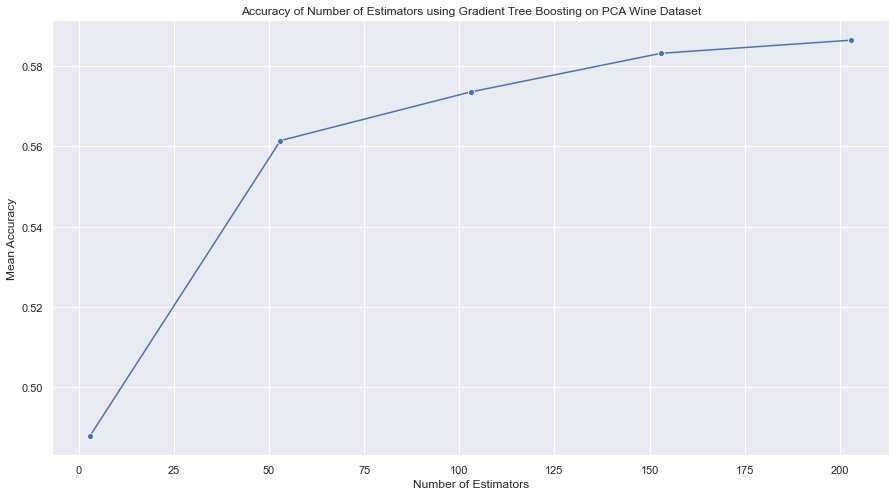

In [230]:
# initialize the plot
sns.set(rc = {'figure.figsize':(15,8)})

# assign the datapoints for the axes
sns.lineplot(data= wine_pca_gtboosting_cv_results, x="Number of Estimators", y="Mean Accuracy",marker="o")

# assign the graph title
plt.title("Accuracy of Number of Estimators using Gradient Tree Boosting on PCA Wine Dataset")

__LDA Dataset__

In [231]:
# generate a dataframe of the maximum depth and the respective score
wine_lda_gtboosting_cv_results = pd.DataFrame([[3, 53, 103, 153, 203],wine_lda_gtboosting_cv.cv_results_['mean_test_score']])

# transpose the dataframe
wine_lda_gtboosting_cv_results = wine_lda_gtboosting_cv_results.T

# name the columns of the dataframe
wine_lda_gtboosting_cv_results.columns = ["Number of Estimators","Mean Accuracy"]

Text(0.5, 1.0, 'Accuracy of Number of Estimators using Gradient Tree Boosting on LDA Wine Dataset')

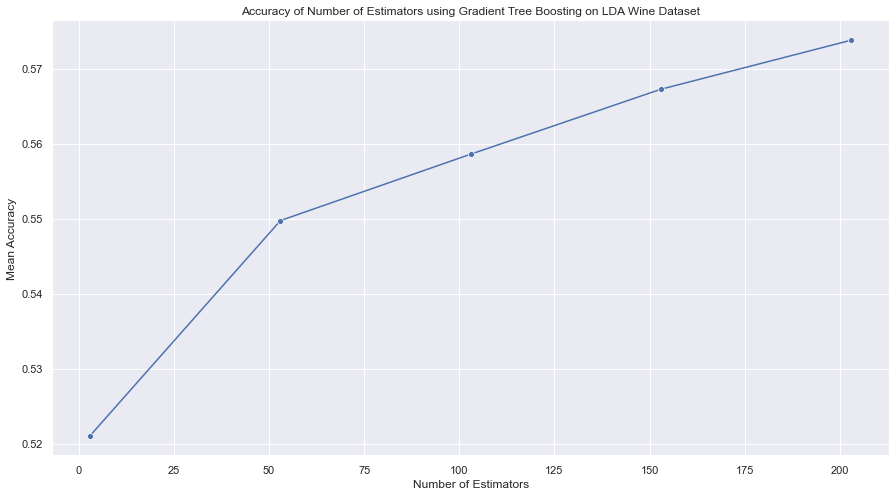

In [232]:
# initialize the plot
sns.set(rc = {'figure.figsize':(15,8)})

# assign the datapoints for the axes
sns.lineplot(data= wine_lda_gtboosting_cv_results, x="Number of Estimators", y="Mean Accuracy",marker="o")

# assign the graph title
plt.title("Accuracy of Number of Estimators using Gradient Tree Boosting on LDA Wine Dataset")

## Question 6: Finial Results

#### 6.1 Comments on Pipe line

##### 6.1.1 Abalone Dataset

The best pipeline for the abalone dataset is by using the raw dataset with the random forest classifier based on the testing accuracy

##### 6.1.2 Wine Dataset

The best pipeline for the wine dataset is by using the raw dataset with the random forest classifier based on the testing accuracy.

#### 6.2 Effect of Dimensionality Reduction

##### 6.2.1 Abalone Dataset

__kNN Classifier__

For the kNN classifier, LDA has the best performance followed by raw dataset and PCA dataset. The difference among the three dataset is very small. As we are using all the components in PCA and LDA, there is no information loss. 


__Naive Bayes__

For both the Naive Bayes calssifiers, the performance of raw dataset is better than that of PCA dataset and LDA datasets. The PCA dataset's performance is slightly less than that of raw dataset. The reason could be that the feature with the most discreminating power may have a small variance. Therefore, the effect of that feature in the classification is reduced.


The LDA dataset accuracy decreased significantly as the abalone dataset is not normally distributed. It may also be possible that LDA could not seperate the labels with use of the mean as the means may be very close.

__Decision Tree__

By applying PCA, the accuracy on the testing data did improve when compared to the raw dataset. 

By applying LDA, the accuracy decreased significantly. This may be because the input features of the abalone dataset are not normally distributed and generalization error for the abalone dataset is high. It may also be possible that LDA could not seperate the labels with use of the mean as the means may be very close.

__Random Forest__

By applying PCA on the abalone dataset, the accuracy decreased when compared to the accuracy of using the raw data with random forest classifier. Although we selected the number of principal components with the highest accuracy for the dataset, when compared to raw data, there is enough data loss that is occurring to causes the raw dataset to outperform the PCA dataset.

Another reason for the raw dataset in outperforming the PCA dataset is that due to the computational requirements of the random forest algorithm, we didn't find the best hyperparameter that could have performed better than raw dataset.

By applying LDA, the accuracy decreased significantly. This may be because the input features of the abalone dataset are not normally distributed and generalization error for the abalone dataset is high.

__Gradient Tree Boosting__

By applying PCA and LDA on the abalone dataset, the accuracy decreased when compared to using raw data with gradient tree boosting classifier. 

The reason for the raw dataset in outperforming the PCA dataset is that due to the computational requirements of the random forest algorithm, we didn't find the best hyperparameter that could have performed better than raw dataset.This is supported by the fact that the gradient of the graph in 6.2.2 is positive as number of estimators is increasing.

##### 6.2.2 Wine Dataset

__kNN Classifier__

The performance of PCA dataset is slightly higher than that of raw dataset and LDA dataset. As all the components were being used for both PCA and LDA, information loss was non-existant. Therefore, performance is similar.


__Naive Bayes__

With Multinomial Naive Bayes, all the testing accuracies were the same.

With Complement Naive Bayes, the raw dataset resulted in to the best accuracy followed by PCA. The testing accuracy of the LDA dataset decreased significantly as the dataset is not normally distributed. It may also be possible that LDA could not seperate the labels with use of the mean as the means may be very close. 

__Decision Tree__

By applying PCA or LDA, the accuracy decreases when compared to that of the raw dataset.

__Random Forest__

By applying PCA and LDA on the abalone dataset, the accuracy decreased when compared to using raw data with random forest classifier. PCA had a higher accuracy than LDA. 

Additionally, this does not mean PCA & LDA are bad for random forest for these datasets. As limited combination of hyperparameters were tried to find the optimum values, it is entirely possible that the best hyperparameter was not discovered.

__Gradient Tree Boosting__

By applying PCA and LDA on the abalone dataset, the accuracy decreased when compared to using raw data with gradient tree boosting classifier. 

This however does not mean that PCA & LDA produce bad results. As limited combination of hyperparameters were tried to find the optimum values, it is entirely possible that the best hyperparameter was not discovered.

#### 6.3 Additional Observations

In the case of both abalone and wine datasets, the accuracy of random forest is the best for the raw dataset. 

For the case of PCA and LDA, kNN produced better test accuracy. The reason for this does not necessarily mean that kNN is better than random forest or gradient boosting for these datasets. The problem is that random forest and gradient tree boosting are computationally expensive. This resulted in trying less hyperparameters for both the classifier. This may have resulted in the optimum hyperparameter to not have been discovered. Therefore, more testing is required to conclude this issue.

This fact is confirmed by the accuracy graph that was generated in 5.2. The gradient of the slope is positive. 

#### 6.4 Result Tables

Since raw, PCA & LDA datasets were using different settings for the same classifiers, the tables have been seperated for ease of understanding

##### 6.4.1 Abalone Dataset

In [233]:
# initialize dataframe
final_abalone_table = pd.DataFrame()

# make the index column
final_abalone_table ["Method"]= ["kNN", "Multinomial NB", "Complement NB", "Decision Tree", "Random Forest", "Gradient Boosting Tree"]
final_abalone_table.set_index("Method", inplace = True)

# add the relevant data
final_abalone_table ["Settings for Raw Dataset"]= ["k = 115 & Euclidean", "No hyperparameter", "No hyperparameter", abalone_raw_tree_cv.best_params_, abalone_raw_rforest_cv.best_params_, abalone_raw_gtboosting_cv.best_params_]
final_abalone_table ["Settings for PCA Dataset"]= ["k = 115, Euclidean, Comp = 3", "No hyperparameter", "No hyperparameter", abalone_pca_tree_cv.best_params_, abalone_pca_rforest_cv.best_params_, abalone_pca_gtboosting_cv.best_params_]
final_abalone_table ["Settings for LDA Dataset"]= ["k = 115, Euclidean, Comp = 3", "No hyperparameter", "No hyperparameter", abalone_lda_tree_cv.best_params_, abalone_lda_rforest_cv.best_params_, abalone_lda_gtboosting_cv.best_params_]
# abalone_summary_table["Raw (Mean Validation Accuracy)"] = [abalone_raw_mnb_train_cv_score,abalone_raw_cnb_train_cv_score]

# generate the column for the test accuracies of the respective classifier used
# kNN value for the raw dataset is copied from the previous assignment
final_abalone_table ["Test Accuracy of Abalone_raw"] = [0.2763,abalone_raw_mnb_cscore_testing,abalone_raw_cnb_cscore_testing,abalone_raw_tree_test_accuracy,abalone_raw_rforest_test_accuracy,abalone_raw_gtboosting_test_accuracy]
final_abalone_table ["Test Accuracy of Abalone_pca"] = [max(abalone_pca_knn_scores), abalone_pca_mnb_cscore_testing, abalone_pca_cnb_cscore_testing, abalone_pca_tree_test_accuracy, abalone_pca_rforest_test_accuracy, abalone_pca_gtboosting_test_accuracy]
final_abalone_table ["Test Accuracy of Abalone_lda"] = [max(abalone_lda_knn_scores), abalone_lda_mnb_cscore_testing, abalone_lda_cnb_cscore_testing, abalone_lda_tree_test_accuracy, abalone_lda_rforest_test_accuracy, abalone_lda_gtboosting_test_accuracy]

# print the table
final_abalone_table

,Settings for Raw Dataset,Settings for PCA Dataset,Settings for LDA Dataset,Test Accuracy of Abalone_raw,Test Accuracy of Abalone_pca,Test Accuracy of Abalone_lda
Method,,,,,,
kNN,k = 115 & Euclidean,"k = 115, Euclidean, Comp = 3","k = 115, Euclidean, Comp = 3",0.276300,0.270335,0.287081
Multinomial NB,No hyperparameter,No hyperparameter,No hyperparameter,0.157895,0.157895,0.157895
Complement NB,No hyperparameter,No hyperparameter,No hyperparameter,0.167464,0.161483,0.071770
Decision Tree,{'max_depth': 5},{'max_depth': 4},{'max_depth': 4},0.242823,0.264354,0.020335
Random Forest,"{'max_depth': 7, 'n_estimators': 303}","{'max_depth': 7, 'n_estimators': 153}","{'max_depth': 7, 'n_estimators': 203}",0.277512,0.261962,0.034689
Gradient Boosting Tree,{'n_estimators': 3},{'n_estimators': 53},{'n_estimators': 53},0.253589,0.239234,0.037081


##### 6.4.2 Wine Dataset

In [238]:
# initialize dataframe
final_wine_table = pd.DataFrame()

# make the index column
final_wine_table ["Method"]= ["kNN", "Multinomial NB", "Complement NB", "Decision Tree", "Random Forest", "Gradient Boosting Tree"]
final_wine_table.set_index("Method", inplace = True)

# add the relevant data
final_wine_table ["Settings for Raw Dataset"]= ["k = 124 & Manhattan", "No hyperparameter", "No hyperparameter", wine_raw_tree_cv.best_params_, wine_raw_rforest_cv.best_params_, wine_raw_gtboosting_cv.best_params_]
final_wine_table ["Settings for PCA Dataset"]= ["k = 124, Manhattan, Comp = 3", "No hyperparameter", "No hyperparameter", wine_pca_tree_cv.best_params_, wine_pca_rforest_cv.best_params_, wine_pca_gtboosting_cv.best_params_]
final_wine_table ["Settings for LDA Dataset"]= ["k = 124, Manhattan, Comp = 3", "No hyperparameter", "No hyperparameter", wine_lda_tree_cv.best_params_, wine_lda_rforest_cv.best_params_, wine_lda_gtboosting_cv.best_params_]
# wine_summary_table["Raw (Mean Validation Accuracy)"] = [wine_raw_mnb_train_cv_score,wine_raw_cnb_train_cv_score]

# generate the column for the test accuracies of the respective dataset for each classifier
# kNN value for the raw dataset is copied from the previous assignment
final_wine_table ["Test Accuracy of wine_raw"] = [0.68230,wine_raw_mnb_cscore_testing,wine_raw_cnb_cscore_testing,wine_raw_tree_test_accuracy,wine_raw_rforest_test_accuracy,wine_raw_gtboosting_test_accuracy]
final_wine_table ["Test Accuracy of wine_pca"] = [max(wine_pca_knn_scores), wine_pca_mnb_cscore_testing, wine_pca_cnb_cscore_testing, wine_pca_tree_test_accuracy, wine_pca_rforest_test_accuracy, wine_pca_gtboosting_test_accuracy]
final_wine_table ["Test Accuracy of wine_lda"] = [max(wine_lda_knn_scores), wine_lda_mnb_cscore_testing, wine_lda_cnb_cscore_testing, wine_lda_tree_test_accuracy, wine_lda_rforest_test_accuracy, wine_lda_gtboosting_test_accuracy]

# print the table
final_wine_table

,Settings for Raw Dataset,Settings for PCA Dataset,Settings for LDA Dataset,Test Accuracy of wine_raw,Test Accuracy of wine_pca,Test Accuracy of wine_lda
Method,,,,,,
kNN,k = 124 & Manhattan,"k = 124, Manhattan, Comp = 3","k = 124, Manhattan, Comp = 3",0.682300,0.683846,0.674615
Multinomial NB,No hyperparameter,No hyperparameter,No hyperparameter,0.438462,0.438462,0.438462
Complement NB,No hyperparameter,No hyperparameter,No hyperparameter,0.427692,0.366154,0.386154
Decision Tree,{'max_depth': 26},{'max_depth': 25},{'max_depth': 25},0.610000,0.391538,0.446923
Random Forest,"{'max_depth': 27, 'n_estimators': 303}","{'max_depth': 17, 'n_estimators': 253}","{'max_depth': 17, 'n_estimators': 303}",0.693077,0.500000,0.453077
Gradient Boosting Tree,{'n_estimators': 203},{'n_estimators': 203},{'n_estimators': 203},0.607692,0.433077,0.402308


## References

1. __PCA using Python (scikit-learn)__, by Michael Galarnyk, _Towards Data Science_, 2017. Click __[here](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)__

2. __Seaborn: statistical data visualization__, by Michael L. Waskom, _Journal of Open Source Software_, 2021. Click __[here](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)__

3. __PCA Background__, by Gellert Toth, _DataSklr_, 2021. Click __[here](https://www.datasklr.com/principal-component-analysis-and-factor-analysis/principal-component-analysis)__

4. __t-SNE Python Example__, by Cory Maklin, _Towards Data Science_, 2019. Click __[here](https://towardsdatascience.com/t-sne-python-example-1ded9953f26)__

5. __Find Maximum Tree Depth__, _Stack Overflow_, 2019. Click __[here](https://stackoverflow.com/questions/54499114/using-sklearn-how-do-i-find-depth-of-a-decision-treem)__

6. __PCA Is Not Feature Selection__, by Brandon Walker, _Towards Data Science_, 2019. Click __[here](https://towardsdatascience.com/pca-is-not-feature-selection-3344fb764ae6#:~:text=While%20it%20is%20technically%20possible,not%20apply%20PCA%20to%20them.)__

7. __Scikit-learn: Machine Learning in Python__, by Pedregosa et al., _JMLR_ 12, pp. 2825-2830, 2011. Click __[here](https://scikit-learn.org/stable/about.html#citing-scikit-learn)__

8. __Decision Tree Classifier in Python Sklearn with Example__, by Afham Fardeen, _Machine Learning Knowledge_, 2021. Click __[here](https://machinelearningknowledge.ai/decision-tree-classifier-in-python-sklearn-with-example/)__

9. __Gradient Boosting with Scikit-Learn, XGBoost, LightGBM, and CatBoost__, by Jason Brownlee, _Machine Learning Mastery_, 2020. Click __[here](https://machinelearningmastery.com/gradient-boosting-with-scikit-learn-xgboost-lightgbm-and-catboost/)__

10. __GridSearchCV for Beginners__, by Scott Okamura, _Towards Data Science_, 2020. Click __[here](https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee)__

11. __Complete guide to Python’s cross-validation with examples__, by Vaclav Dekanovsky, _Towards Data Science_, 2020. Click __[here](https://towardsdatascience.com/complete-guide-to-pythons-cross-validation-with-examples-a9676b5cac12)__

12. __Linear Discriminant Analysis With Python__, by Jason Brownlee, _Machine Learning Mastery_, 2020. Click __[here](https://machinelearningmastery.com/linear-discriminant-analysis-with-python/)__

13. __Decision Trees in Python with Scikit-Learn__, by Scott Robinson, _Stack Abuse_. Click __[here](https://stackabuse.com/decision-trees-in-python-with-scikit-learn/)__

14. __Markdown for Jupyter notebooks cheatsheet__, by Inge Halilovic, _Medium_, 2017. Click __[here](https://ingeh.medium.com/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed)__

15. __Complement Naive Bayes (CNB) Algorithm__, by Alakesh Bora, _Geeks for Geeks_, 2020. Click __[here](https://www.geeksforgeeks.org/complement-naive-bayes-cnb-algorithm/#:~:text=Complement%20Naive%20Bayes%20is%20somewhat,examples%20belonging%20to%20other%20classes.)__